
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [3]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
# TODO: check for missing values

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56


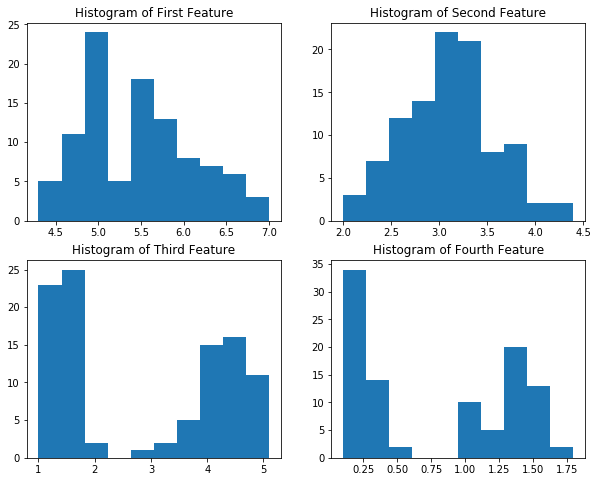

In [4]:
fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

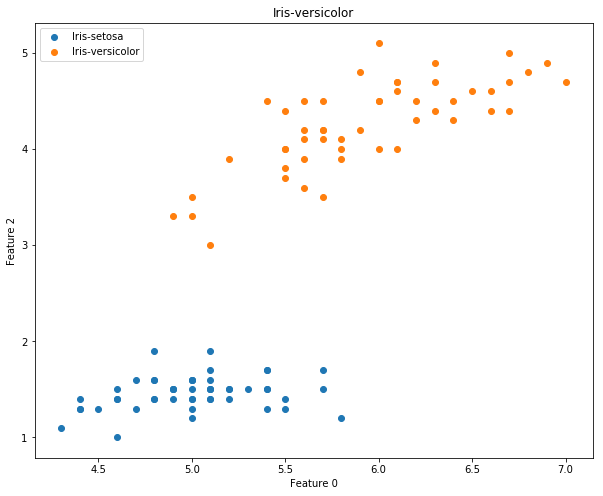

In [5]:
plt.figure(figsize=(10,8))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the hidden layer connected to the output layer with 1 neuron.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [11]:
class NN:
    # weight initialization is in range -4*sqrt(6/numNeuronsInLayer) and +4*sqrt(6/numNeuronsInLayer)
    weights1 = np.random.uniform(-4*np.sqrt(6.0/4), 4*np.sqrt(6.0/4), size=(3, 1))
    weights2 = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(2, 1))
    
    
    def __init__(self, learning_rate, epochs, regularization, regularizationTerm):
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.lamReg = regularizationTerm
        self.maxEpochs = epochs
        self.errors = []

    def forwardPass(self, x):
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        
        # adding bias
        self.inp = np.hstack((np.ones((len(x), 1)), x))
        self.hiddenActivation = sigmoid(np.dot(self.inp, self.weights1))
        # adding bias
        self.hiddenOut = np.hstack((np.ones((len(x), 1)), self.hiddenActivation))
        self.prediction = sigmoid(np.dot(self.hiddenOut, self.weights2))
        return self.prediction
    
    
    def train(self,data):
        samples = data[:, :2]
        targets = data[:, 2]
        
        epochs = 0
        converged = False        
        while not converged:
            epochs += 1
            totalError = 0.0
            samples = np.random.permutation(samples)
            for i, sample in enumerate(samples):
                sample = np.expand_dims(sample, axis=0)
                pred = self.forwardPass(sample)
                cost = self.costFunction(pred, targets[i])
                totalError += np.sum(cost)
                print(f'totalError: {totalError}')
                
                # backpropagate
#                 delta2 = np.dot(self.costFunction(pred, targets[i], derived=True), self.hiddenActivation)
#                 print(delta2.shape)
#                 delta1 = np.dot(delta2*weights2)
#                 print(delta1.shape)
                #print(f' derived sig: \n {derivedSigmoid(pred)}')
                delta2 = self.lossFunction(self.hiddenOut, pred, targets[i]) * derivedSigmoid(pred)
                #print(f' Delta 2 matrix: \n {delta2}')
                #print(f'weight matrix: \n {self.weights2.T}')
                delta1 = np.dot(self.weights2.T, delta2) * derivedSigmoid(self.hiddenActivation) #self.hiddenActivation*(np.ones((len(self.hiddenActivation), 1))-self.hiddenActivation) 
                #print(f' HiddenActivation: \n {self.hiddenActivation*(np.ones((len(self.hiddenActivation), 1))-self.hiddenActivation)}')
                #print(f' Delta 1 matrix: \n {delta1}')
                # update weights
                regTermW2 = self.lamReg/2 *np.sum(self.weights2)**2 if self.regularization else 0
                regTermW1 = self.lamReg/2 *np.sum(self.weights1)**2 if self.regularization else 0
                # bias does not get regularized
                self.weights2[0] += self.learning_rate * (1/(i+1) * np.sum(delta2))
                self.weights1[0] += self.learning_rate * (1/(i+1) * np.sum(delta1))
                self.weights2 += self.learning_rate * (1/(i+1) * (delta2 + regTermW2))
                self.weights1 += self.learning_rate * (1/(i+1) * (delta1 + regTermW1))
#                 totalError += np.sum(delta2)
#                 totalError += np.sum(delta1)
            # totalError += error
            
            self.errors.append(totalError)
            if epochs%100 == 0:
                print(f'Error in epoch {epochs}: {totalError}')
            if self.maxEpochs != 0:
                if epochs >= self.maxEpochs:
                    break
            if np.abs(totalError) < 0.005:
                converged = True
        print(f'Converged after {epochs} epochs.')
        
    def lossFunction(self, X, pred, target):
        return np.dot(X.T, target-pred) / pred.size
        
        

    def costFunction(self, pred, target, derived=False):
        # print(f'pred.shape {pred.shape} target.shape {target.shape}')
        # np.log(0) == -inf
        if not derived:
#             if pred == 0.0:
#                 if target == 0:
#                     cost = 0
#                 else:
#                     print("Target 1 and prediction 0 far apart")
#                     cost = 25
#             elif pred == 1.0:
#                 if target == 1.0:
#                     cost = 0
#                 else:
#                     print("Target 0 and prediction 1 far apart")
#                     cost = 25
#             else:
                cost = (-target*np.log(pred)-(1-target)*np.log(1-pred)).mean()
        else:
            cost = target-pred
#         if not derived:
#             cost = 0.5*(target-pred)**2
#         else:
#             cost = -(target-pred)
        return cost


In [12]:
# Putting these in vector shapes
nn = NN(learning_rate = 0.01, epochs=0, regularization=True, regularizationTerm=0.001)

nn.train(data)


totalError: 0.24465638554988775
totalError: 1.7592390653316565
totalError: 3.4917468033673176
totalError: 3.740192483442666
totalError: 5.461320253277201
totalError: 7.185862172483285
totalError: 7.41718136352404
totalError: 9.138525411165697
totalError: 10.566951507512135
totalError: 12.049287031473277
totalError: 13.61326967314237
totalError: 13.851360390330575
totalError: 15.398625691818273
totalError: 17.112497751935013
totalError: 18.666144546059225
totalError: 18.938000308703934
totalError: 19.17782182361225
totalError: 20.89864015008697
totalError: 22.601254682026134
totalError: 22.799640186927213
totalError: 24.15343207282912
totalError: 25.675239138602716
totalError: 25.937705212902554
totalError: 26.137637155544212
totalError: 27.848628694765154
totalError: 29.2980857039563
totalError: 29.541529504498985
totalError: 29.738643596981976
totalError: 29.933345180825942
totalError: 30.12929243535348
totalError: 30.35194188187613
totalError: 30.61443376111925
totalError: 30.8710071

totalError: 57.72261447063065
totalError: 59.08656161383533
totalError: 60.73514848275457
totalError: 60.9475882845591
totalError: 61.16013702806944
totalError: 62.64524389924143
totalError: 62.855313314237506
totalError: 64.38120610058176
totalError: 64.59712919253778
totalError: 66.06770945392446
totalError: 67.7059576113556
totalError: 67.91594680867293
totalError: 68.17678440921381
totalError: 69.83260303318242
totalError: 71.48746687087295
totalError: 73.14543375239883
totalError: 74.63287753689008
totalError: 76.28026781430455
totalError: 76.49430364306595
totalError: 76.70699565276831
totalError: 76.91744099531451
totalError: 77.15648204307425
totalError: 77.40233915097333
totalError: 77.61732958165716
totalError: 79.25229579109342
totalError: 79.52714111477582
totalError: 79.7848236859898
totalError: 80.05490702360306
totalError: 81.69696107941262
totalError: 81.96148996561705
totalError: 83.61517706738486
totalError: 83.8731651354502
totalError: 85.5353281437718
totalError: 86

totalError: 39.93247273268897
totalError: 41.51773462396956
totalError: 43.08957935863902
totalError: 44.67536611433407
totalError: 46.254224316439874
totalError: 47.84445625894295
totalError: 48.13491401458087
totalError: 49.54717600339102
totalError: 49.77608167112008
totalError: 50.0053275663298
totalError: 51.57668772471392
totalError: 53.165288693677766
totalError: 54.52577800083317
totalError: 54.75934822367672
totalError: 54.99163490646263
totalError: 56.32609491245913
totalError: 56.55946995185748
totalError: 57.83116771125375
totalError: 59.236333787476376
totalError: 59.51456649768158
totalError: 59.7934893880913
totalError: 61.38256280257222
totalError: 61.64066348385878
totalError: 63.22198390952488
totalError: 63.51958678896583
totalError: 65.10321480833755
totalError: 66.52040417206169
totalError: 66.75463654540293
totalError: 66.98359123127739
totalError: 68.44560981415472
totalError: 69.92692365521486
totalError: 71.32679968011612
totalError: 72.71927077458034
totalErro

totalError: 58.41192239195219
totalError: 58.7079791496371
totalError: 60.239026419470186
totalError: 60.55381557514835
totalError: 62.07809544839106
totalError: 62.355759330384075
totalError: 63.88114872579738
totalError: 65.16430884850314
totalError: 65.40563169555368
totalError: 65.67957226663046
totalError: 67.21174388770389
totalError: 68.72866153716578
totalError: 70.2581065814283
totalError: 71.64797594481732
totalError: 73.16361343128057
totalError: 73.49840486764657
totalError: 73.7420007149242
totalError: 74.07046751453669
totalError: 74.31410322187354
totalError: 74.6110038498946
totalError: 74.91980348815886
totalError: 76.1769023172432
totalError: 76.5155385358217
totalError: 76.76236643752291
totalError: 77.058080199876
totalError: 78.39884795903141
totalError: 78.6472245521034
totalError: 80.17955033274521
totalError: 80.42307482951368
totalError: 81.94428692940642
totalError: 83.31291209650497
totalError: 84.6838829939319
totalError: 86.04959562739924
totalError: 0.2447

totalError: 12.65158699155973
totalError: 14.112755560632946
totalError: 15.407234108101614
totalError: 16.779462614388024
totalError: 17.04128973398592
totalError: 17.35412787593576
totalError: 18.812080566598077
totalError: 20.04599719629881
totalError: 20.309629544617202
totalError: 21.648554487379624
totalError: 23.122488234819578
totalError: 23.3849015680852
totalError: 23.724817400234144
totalError: 25.179912366099426
totalError: 26.274860687512966
totalError: 26.599934623541085
totalError: 26.863544215000275
totalError: 27.17973682298782
totalError: 27.524128449266264
totalError: 27.78222082193701
totalError: 28.091793077137027
totalError: 28.39342701223096
totalError: 28.692600727417904
totalError: 29.049348817800286
totalError: 29.309700183385978
totalError: 29.624475903744994
totalError: 31.096458697567844
totalError: 31.35703815128996
totalError: 32.62797021490377
totalError: 33.92471447989331
totalError: 34.18693701435119
totalError: 35.487247905351836
totalError: 35.746864

totalError: 41.32785165688638
totalError: 42.746405958864734
totalError: 44.171338555270125
totalError: 45.58527680969456
totalError: 45.85959030614963
totalError: 47.06498249973017
totalError: 47.37376419400409
totalError: 47.750161703139604
totalError: 49.01804876458691
totalError: 50.32364507097755
totalError: 51.72224673209248
totalError: 52.08566623149059
totalError: 52.416967286062146
totalError: 53.82397615414269
totalError: 54.09947440634744
totalError: 55.298461740229605
totalError: 56.736421705569384
totalError: 57.078068601360776
totalError: 57.414052033677414
totalError: 58.83252901569107
totalError: 59.16520662178209
totalError: 60.40148090257142
totalError: 60.676537476381846
totalError: 61.88168273495068
totalError: 63.15061365136174
totalError: 63.50861948322722
totalError: 63.82733763526074
totalError: 65.14024160020793
totalError: 66.43168713619004
totalError: 67.86114778712691
totalError: 68.91391559854387
totalError: 70.12284187154246
totalError: 70.39787780233456
t

totalError: 5.942568706800318
totalError: 7.0870843888244295
totalError: 8.467788390577972
totalError: 9.70849789112628
totalError: 10.822817834030774
totalError: 11.116345028669803
totalError: 12.47818022808351
totalError: 13.852668860813335
totalError: 15.104334377248595
totalError: 15.39661367502908
totalError: 15.69344244509601
totalError: 17.076650923158116
totalError: 18.44697696064656
totalError: 18.744893953067503
totalError: 19.898935919483414
totalError: 21.273098226047217
totalError: 21.708574546619932
totalError: 22.10718237193236
totalError: 23.479255871434
totalError: 24.85538725256192
totalError: 25.149202211499972
totalError: 25.441406511291888
totalError: 25.730893816209097
totalError: 26.088302067698127
totalError: 26.380664115005686
totalError: 26.67515242234563
totalError: 27.003096761548093
totalError: 27.34959428761334
totalError: 27.645297936525424
totalError: 28.00172419653824
totalError: 28.380625369635457
totalError: 29.600939072299422
totalError: 29.894953525

totalError: 50.26567679027372
totalError: 51.409047381360885
totalError: 52.741163965418004
totalError: 53.08496372210689
totalError: 53.455963224353795
totalError: 54.791921673582664
totalError: 55.19790920384844
totalError: 56.5288495396852
totalError: 56.832264848793926
totalError: 58.15914222069483
totalError: 59.49894766596716
totalError: 59.879830070946255
totalError: 60.188373601110165
totalError: 61.36861400066394
totalError: 62.54301959845792
totalError: 63.48371331392676
totalError: 64.81677572959339
totalError: 66.13990390369408
totalError: 66.44689554630156
totalError: 66.79538584524174
totalError: 67.2420968913433
totalError: 67.60892766120729
totalError: 67.91451501348361
totalError: 68.26615928166474
totalError: 69.5728038977588
totalError: 69.92602092202445
totalError: 70.28928964135324
totalError: 70.59259623445314
totalError: 71.75896131119336
totalError: 72.16814294080392
totalError: 73.48704896850978
totalError: 73.79608553944324
totalError: 75.11379742017073
totalE

totalError: 63.43172652511051
totalError: 64.61113567727585
totalError: 65.01423169818244
totalError: 65.3395646927035
totalError: 65.72775974035784
totalError: 66.14335180009597
totalError: 66.46618533535171
totalError: 66.78624002893399
totalError: 67.91118124409398
totalError: 68.23118707360574
totalError: 68.54851211361324
totalError: 68.93608645147414
totalError: 70.21520329576107
totalError: 70.60182878221035
totalError: 71.90085877994132
totalError: 72.21800050822037
totalError: 73.50511007079146
totalError: 74.77417838845118
totalError: 75.96106636907913
totalError: 77.13479824781653
totalError: 0.36949545722710025
totalError: 1.6511629479518182
totalError: 2.941114321610673
totalError: 3.2648529037794343
totalError: 4.56428783862507
totalError: 5.8641708541641915
totalError: 6.188446450466582
totalError: 7.303139563002695
totalError: 8.59185090138388
totalError: 9.885385130327833
totalError: 11.149419185085138
totalError: 11.566334959094258
totalError: 12.471437985336001
total

totalError: 16.522891695925956
totalError: 17.598887750882767
totalError: 18.039832697616564
totalError: 18.997308414744975
totalError: 20.237855822219185
totalError: 20.65326505192502
totalError: 20.992302004089908
totalError: 22.249302253149963
totalError: 23.47676690511256
totalError: 23.879036774227796
totalError: 24.266518759867484
totalError: 24.61001543733744
totalError: 25.084586512998385
totalError: 25.57210889580945
totalError: 25.979425609047535
totalError: 26.37280195473013
totalError: 26.77789097062274
totalError: 27.212159119128202
totalError: 27.545560475158084
totalError: 27.887709173631595
totalError: 28.984095048395528
totalError: 29.31910130263676
totalError: 30.568674877387387
totalError: 31.63373935344573
totalError: 31.972941279410136
totalError: 33.078563769820065
totalError: 33.41578164333149
totalError: 34.291334377519554
totalError: 34.627623680350574
totalError: 35.03330731263199
totalError: 35.367036202379
totalError: 35.70555438846526
totalError: 36.8524959

totalError: 14.926368510557431
totalError: 15.282745117890764
totalError: 16.27286667370912
totalError: 17.327678075118705
totalError: 17.779127167206138
totalError: 18.99064497567138
totalError: 20.050566179705708
totalError: 20.47266815038657
totalError: 20.820486465086397
totalError: 22.028971389096416
totalError: 22.908657303579982
totalError: 23.259849092295145
totalError: 23.60967444507754
totalError: 23.965328620862987
totalError: 24.412528810643508
totalError: 24.835683220060854
totalError: 25.188985812766635
totalError: 25.58080291729318
totalError: 25.93100660820706
totalError: 26.288533139704608
totalError: 26.70664384598198
totalError: 27.130157036041194
totalError: 28.23226314565573
totalError: 28.581395603261914
totalError: 29.798947391007502
totalError: 30.869610951942022
totalError: 31.222414536247946
totalError: 32.434427840779655
totalError: 32.873994044726736
totalError: 33.870536770914924
totalError: 34.22177545233006
totalError: 34.57299566173713
totalError: 34.987

totalError: 51.20193854324446
totalError: 51.63525685179511
totalError: 52.05308820964176
totalError: 53.11881051864347
totalError: 53.586372052183776
totalError: 54.77044232536086
totalError: 55.13877632350642
totalError: 55.96240710185354
totalError: 56.93553028048206
totalError: 57.351723704521895
totalError: 57.72104455273556
totalError: 58.708262747130284
totalError: 59.73771489256077
totalError: 60.9188209358068
totalError: 61.95429111978639
totalError: 62.90112857199653
totalError: 63.33409710895813
totalError: 63.74663630903196
totalError: 64.10749656236771
totalError: 64.47441645426866
totalError: 64.84036330529743
totalError: 65.20677059431648
totalError: 66.12432422718207
totalError: 66.5718561390793
totalError: 67.12592366034997
totalError: 67.4943045914396
totalError: 68.6936624881144
totalError: 69.14911217464316
totalError: 70.11690302745366
totalError: 70.48588248328005
totalError: 71.67180635489524
totalError: 72.85768196621909
totalError: 73.89930186939604
totalError:

totalError: 36.62852291220076
totalError: 37.67853362604151
totalError: 38.644905168039685
totalError: 39.63782964358562
totalError: 40.01423126655265
totalError: 41.00377048055641
totalError: 41.3825527974161
totalError: 41.75637434826608
totalError: 42.90123488595564
totalError: 44.0493275663014
totalError: 45.20175394533426
totalError: 45.58443252922438
totalError: 46.00507054587453
totalError: 46.98309706116403
totalError: 47.43516523123864
totalError: 48.460552784430746
totalError: 49.42133550313081
totalError: 49.8094140228534
totalError: 50.24205633233404
totalError: 51.25041396431723
totalError: 51.624075481029166
totalError: 52.60797530096504
totalError: 53.13496089980858
totalError: 54.28830658857812
totalError: 55.161034658215584
totalError: 55.61370456042782
totalError: 56.09735976667074
totalError: 57.2632564290914
totalError: 58.41434879162565
totalError: 59.57254149145927
totalError: 60.731083092416235
totalError: 61.87741164536071
totalError: 62.38507926646302
totalErro

totalError: 58.899880879039294
totalError: 59.883022397296294
totalError: 60.87143454716712
totalError: 62.008351808258595
totalError: 62.57389803760518
totalError: 63.07792001009394
totalError: 63.4651772170378
totalError: 63.85834136294736
totalError: 64.24931699313996
totalError: 64.63541331466566
totalError: 65.6136291756262
totalError: 66.07990609392722
totalError: 66.60658430218612
totalError: 67.08208561499971
totalError: 67.89472131150893
totalError: 68.3393042475581
totalError: 69.24074364326447
totalError: 69.69714045489098
totalError: 70.63527634215266
totalError: 71.77060541011001
totalError: 72.71605192683656
totalError: 73.83885313825543
totalError: 0.4389653509676023
totalError: 1.5745797249014133
totalError: 2.5977341692724814
totalError: 2.9886253462817107
totalError: 3.8461037564338962
totalError: 4.872410582685678
totalError: 5.257549474461084
totalError: 6.390911195766357
totalError: 7.513395567771359
totalError: 8.634125230297354
totalError: 9.772977657061036
total

totalError: 32.30347411919543
totalError: 33.41543012267308
totalError: 33.97079522124958
totalError: 34.370274054479836
totalError: 34.781011481510724
totalError: 35.18071047475984
totalError: 36.17153749453659
totalError: 37.04411739470205
totalError: 37.88257183636226
totalError: 38.70255600248476
totalError: 39.80855509616936
totalError: 40.28731884714765
totalError: 41.249080821092946
totalError: 41.65492932876226
totalError: 42.12829812916921
totalError: 43.2396534159395
totalError: 44.189542914991456
totalError: 45.29940344946503
totalError: 45.79763516673588
totalError: 46.25339678815349
totalError: 47.35621491311853
totalError: 47.757316110426345
totalError: 48.866709451966095
totalError: 49.970854009980414
totalError: 50.4226462889139
totalError: 50.89921461710546
totalError: 51.80460878006489
totalError: 52.20681092705772
totalError: 53.311479971563976
totalError: 53.846939461273735
totalError: 54.9478242860166
totalError: 55.78133069596281
totalError: 56.18633779156679
tota

totalError: 44.510717900022684
totalError: 45.03262830937925
totalError: 45.556998714986676
totalError: 46.641726955271814
totalError: 47.05159066333654
totalError: 48.13369956566153
totalError: 49.217860952568785
totalError: 49.63148260276613
totalError: 50.04661529644933
totalError: 50.940170377890375
totalError: 51.411377324607635
totalError: 52.50084301966839
totalError: 52.97819134858754
totalError: 53.83063282254849
totalError: 54.90270744338574
totalError: 55.316903312807945
totalError: 55.73135967939611
totalError: 56.82508603458935
totalError: 57.639540883930145
totalError: 58.72989524387452
totalError: 59.81671470160604
totalError: 60.71990000909955
totalError: 61.129011220367325
totalError: 61.546848767895135
totalError: 61.95418517352139
totalError: 62.36499642403735
totalError: 62.914845128688576
totalError: 63.51084056454304
totalError: 64.4504917514215
totalError: 64.98276120703744
totalError: 65.48543664047149
totalError: 66.02105057560486
totalError: 67.10797072304234


totalError: 29.696913189251358
totalError: 30.63129477274255
totalError: 31.055901329881745
totalError: 32.11631843802455
totalError: 32.542501759991026
totalError: 32.96351014370328
totalError: 33.444188463401325
totalError: 33.86640496787289
totalError: 34.922038711880504
totalError: 35.983494947031375
totalError: 36.86467785165749
totalError: 37.80510953787377
totalError: 38.72846522178312
totalError: 39.151122024402866
totalError: 40.13122478461144
totalError: 40.55512669722558
totalError: 40.974015651929314
totalError: 41.858584780438115
totalError: 42.92324031514097
totalError: 43.9796603228108
totalError: 44.4026178970019
totalError: 44.87222587730662
totalError: 45.93281886765646
totalError: 46.45374558541923
totalError: 47.423542170638946
totalError: 48.22045864959511
totalError: 48.760100334058734
totalError: 49.26445019661221
totalError: 50.32498254351472
totalError: 50.80813865829999
totalError: 51.737128309173286
totalError: 52.226919597950676
totalError: 53.28688881398054

totalError: 4.460266728391984
totalError: 4.894832325288867
totalError: 5.94688220513856
totalError: 6.8503924861712315
totalError: 7.882519308800733
totalError: 8.844289165302518
totalError: 9.284277228325507
totalError: 10.331909097715382
totalError: 11.149536614952533
totalError: 12.196258035858994
totalError: 12.628860817720588
totalError: 13.11001684476955
totalError: 14.0151391866752
totalError: 14.915673686664986
totalError: 15.355689553921742
totalError: 16.218930248137546
totalError: 17.253076466175997
totalError: 17.69108355931958
totalError: 18.240362453448306
totalError: 19.284570519256874
totalError: 20.307870295631137
totalError: 20.82228857939492
totalError: 21.256230674104483
totalError: 21.779990767005025
totalError: 22.21599506450961
totalError: 22.77793938723212
totalError: 23.216115557178565
totalError: 23.715779445759512
totalError: 24.151083092004683
totalError: 24.748611140277806
totalError: 25.32500056690305
totalError: 25.84283919898014
totalError: 26.899889757

totalError: 39.329999253627875
totalError: 40.25685232811616
totalError: 40.828103960902396
totalError: 41.27028525236001
totalError: 42.18936945482432
totalError: 43.01588425413145
totalError: 43.869088965731606
totalError: 44.31039400402457
totalError: 44.748061335048234
totalError: 45.56022368041988
totalError: 46.088348160659024
totalError: 47.121959291902826
totalError: 47.99631539234287
totalError: 48.43561092517139
totalError: 48.883447230981155
totalError: 49.8130508156248
totalError: 50.25294943686839
totalError: 51.28180723613534
totalError: 51.722986727770966
totalError: 52.61739137341195
totalError: 53.465265304034865
totalError: 53.915128553557395
totalError: 54.40556226942742
totalError: 55.33165331729884
totalError: 56.36286743428842
totalError: 57.39198995214814
totalError: 58.40958172368086
totalError: 59.30660203384174
totalError: 59.862038306296576
totalError: 60.29961139650523
totalError: 60.98381970136294
totalError: 61.50069453307607
totalError: 61.944950081687175

totalError: 30.370079552921336
totalError: 31.37078843951902
totalError: 31.828013995643275
totalError: 32.27903566088665
totalError: 32.736206138051976
totalError: 33.185499341282544
totalError: 34.0638201453588
totalError: 34.94275849169501
totalError: 35.95642939786889
totalError: 36.78772084092583
totalError: 37.79189615223803
totalError: 38.24504748783865
totalError: 39.1556314351641
totalError: 39.706652063093145
totalError: 40.28054992561532
totalError: 41.2841419435322
totalError: 42.29217935310088
totalError: 43.20549795505433
totalError: 43.72100343122377
totalError: 44.252868268885855
totalError: 45.00696271277324
totalError: 45.470895265791
totalError: 46.34670931599099
totalError: 47.21971215812074
totalError: 47.67643023509059
totalError: 48.12369826948147
totalError: 49.00508793096165
totalError: 49.45674718472638
totalError: 50.31092046666965
totalError: 50.87767809190806
totalError: 51.78755280724598
totalError: 52.79878788697255
totalError: 53.24417390774307
totalErro

totalError: 60.20793655380164
totalError: 60.79074044847677
totalError: 61.260178147845984
totalError: 61.72846606206379
totalError: 62.28907189285981
totalError: 62.75326162844047
totalError: 63.74242656471297
totalError: 64.2005596623957
totalError: 64.6599901925805
totalError: 65.21087471520977
totalError: 66.0734161035949
totalError: 66.53787301279097
totalError: 67.52803945209638
totalError: 67.9918857672472
totalError: 68.85714734489041
totalError: 69.67952878664353
totalError: 70.53569097473098
totalError: 71.2754244753768
totalError: 0.45949099462306714
totalError: 1.3176252947092675
totalError: 1.9941057059183986
totalError: 2.4568066111896667
totalError: 3.196831250803827
totalError: 4.188141346676061
totalError: 4.650067014382876
totalError: 5.406795542635351
totalError: 6.264982594632119
totalError: 6.967192452346028
totalError: 7.820614318185294
totalError: 8.368682539471843
totalError: 9.352666326563016
totalError: 10.340807410789436
totalError: 11.322319241679768
totalEr

totalError: 4.657365917742211
totalError: 5.251357855069426
totalError: 5.979929733918818
totalError: 6.8314981485789055
totalError: 7.670242884210185
totalError: 8.524516266453595
totalError: 9.002019835530234
totalError: 9.850814654171124
totalError: 10.693172697725464
totalError: 11.485080372571035
totalError: 12.078786414353791
totalError: 12.64019216003075
totalError: 13.61091464616949
totalError: 14.47976595416842
totalError: 15.05343193722117
totalError: 16.031019320855766
totalError: 17.010072179629386
totalError: 17.47778464620875
totalError: 18.019600436666092
totalError: 18.984110837283747
totalError: 19.753146079710802
totalError: 20.290104546965058
totalError: 20.76015833474016
totalError: 21.483124554216822
totalError: 22.040125579966944
totalError: 22.514696072650676
totalError: 23.064320500559983
totalError: 23.53480374964373
totalError: 24.09932599737618
totalError: 24.571151485995475
totalError: 25.04521325126983
totalError: 25.51597311075926
totalError: 26.2475824757

totalError: 2.434863730272656
totalError: 2.921132201794712
totalError: 3.7044834674345495
totalError: 4.671585970435948
totalError: 5.149123239795003
totalError: 6.124288985652381
totalError: 7.097995854130073
totalError: 7.975592531580487
totalError: 8.944647623860867
totalError: 9.53024454988671
totalError: 10.491010551429623
totalError: 11.452477690930337
totalError: 12.408656829410388
totalError: 12.89283682371476
totalError: 13.424331773994174
totalError: 14.158447008047164
totalError: 14.995181159504826
totalError: 15.482064979671602
totalError: 16.317472980420902
totalError: 17.284081136365565
totalError: 17.847894613882065
totalError: 18.411057231570076
totalError: 19.373932771781813
totalError: 20.33709679351351
totalError: 20.819710672077637
totalError: 21.305557310885508
totalError: 21.787186776801377
totalError: 22.265607506496575
totalError: 22.86696424918768
totalError: 23.42521716856427
totalError: 24.031310704427504
totalError: 24.62982623926902
totalError: 25.23240237

totalError: 39.53746343137762
totalError: 40.487787541867874
totalError: 41.35471768067844
totalError: 42.31639178593002
totalError: 42.795462807693
totalError: 43.28716413256271
totalError: 44.11332242781168
totalError: 44.60187786175303
totalError: 45.38557120634209
totalError: 46.16515122454509
totalError: 46.650238010107984
totalError: 47.14359328511496
totalError: 48.01986833727139
totalError: 48.51848707577639
totalError: 49.322620800198344
totalError: 49.8820577395592
totalError: 50.830469545326395
totalError: 51.793032027863106
totalError: 52.27446837075175
totalError: 52.767367913119
totalError: 53.64502267820049
totalError: 54.59510579478077
totalError: 55.41628479823692
totalError: 56.19824287395824
totalError: 56.89464102120056
totalError: 57.568668221659955
totalError: 58.192491319130795
totalError: 58.76792340368884
totalError: 59.4073554621926
totalError: 59.89505202345872
totalError: 60.38134898462315
totalError: 61.21395249464487
totalError: 61.697074150530696
totalErr

totalError: 21.598030966444085
totalError: 22.096546905991765
totalError: 22.589084879036044
totalError: 23.09623205384837
totalError: 23.71729677380479
totalError: 24.217386447589643
totalError: 24.713945460561515
totalError: 25.28832899636445
totalError: 25.97209190967545
totalError: 26.81754670716695
totalError: 27.3973210366095
totalError: 28.184901968782683
totalError: 29.006658896901833
totalError: 29.507934093307767
totalError: 30.33028181984072
totalError: 31.081916175167407
totalError: 31.895030389979564
totalError: 32.47950335657738
totalError: 33.0976496800564
totalError: 33.797450514086954
totalError: 34.29061310100255
totalError: 35.10127033072098
totalError: 36.05042610153883
totalError: 36.78976322660654
totalError: 37.726925858297534
totalError: 38.50426212689552
totalError: 39.14138915602449
totalError: 40.07941859960498
totalError: 40.64573320778523
totalError: 41.27536590536986
totalError: 42.03637310566598
totalError: 42.84191923659765
totalError: 43.780328621602784

totalError: 48.487547277180404
totalError: 49.410839108415686
totalError: 50.14284343395497
totalError: 51.07036004403833
totalError: 51.56891570712536
totalError: 52.3595668676097
totalError: 53.05371832558116
totalError: 53.647434768723734
totalError: 54.147561903412196
totalError: 54.94785788045814
totalError: 55.80333512827986
totalError: 56.57154707852601
totalError: 57.350404826616575
totalError: 58.10238312882483
totalError: 58.72997045557963
totalError: 59.35888041596266
totalError: 59.86481985498463
totalError: 60.37885380586451
totalError: 60.88511360208481
totalError: 61.47668211699938
totalError: 62.284910108707585
totalError: 62.78867573066782
totalError: 63.49693202503234
totalError: 64.17673394809778
totalError: 64.93623273754244
totalError: 65.44058998334447
totalError: 66.37164957167579
totalError: 66.87682796941986
totalError: 67.79503463685573
totalError: 68.63002089817098
totalError: 69.55138678895406
totalError: 70.47152763640848
totalError: 0.5008928590348032
tota

totalError: 58.977790618405216
totalError: 59.59157318373789
totalError: 60.096375579099124
totalError: 60.6070202815734
totalError: 61.11701766467184
totalError: 61.755124542692265
totalError: 62.4027921366711
totalError: 63.321859240216206
totalError: 63.91610417866325
totalError: 64.53724110682131
totalError: 65.0530440583935
totalError: 65.98139204476902
totalError: 66.48567819045297
totalError: 67.17242891066674
totalError: 67.67894884605884
totalError: 68.59612235936955
totalError: 69.51418643768434
totalError: 70.4371908352079
totalError: 71.24688816846754
totalError: 0.5937250717862235
totalError: 1.5070282174855156
totalError: 2.4296804552071585
totalError: 2.9503170736828013
totalError: 3.691147739665401
totalError: 4.373572722148687
totalError: 4.881751915908291
totalError: 5.625381227142343
totalError: 6.29563392277639
totalError: 7.098797693820704
totalError: 8.015356784854502
totalError: 8.522912469297498
totalError: 9.31666827291824
totalError: 10.239335036662004
totalEr

totalError: 32.165838653135296
totalError: 32.67866237600207
totalError: 33.373582127906275
totalError: 33.892538703999556
totalError: 34.407685699732326
totalError: 35.19893204503666
totalError: 36.10735550800702
totalError: 37.01525862610948
totalError: 37.91758262344644
totalError: 38.69681148771057
totalError: 39.20970845448513
totalError: 40.12103709056957
totalError: 40.63052400915954
totalError: 41.2491289473064
totalError: 42.05761377137976
totalError: 42.961631818310465
totalError: 43.8758557180035
totalError: 44.52152229283985
totalError: 45.03548299374288
totalError: 45.941024217836215
totalError: 46.61313072630599
totalError: 47.27650653845524
totalError: 48.19200063634074
totalError: 48.710824863247225
totalError: 49.30681776783862
totalError: 50.058485028679755
totalError: 50.71379283762518
totalError: 51.47594961111944
totalError: 52.223862586657134
totalError: 53.01539012998015
totalError: 53.810078293197954
totalError: 54.327068435848155
totalError: 54.93771739808926
t

totalError: 43.49717071865079
totalError: 44.01736584376998
totalError: 44.90820706894162
totalError: 45.4317206813238
totalError: 46.159490004104626
totalError: 47.052731157771404
totalError: 47.57596625607788
totalError: 48.095467311854925
totalError: 48.98872571974599
totalError: 49.51642778020003
totalError: 50.2910442812064
totalError: 50.81804674352427
totalError: 51.59334525631763
totalError: 52.49707082167335
totalError: 53.228859337580474
totalError: 53.85726504789466
totalError: 54.59762262730912
totalError: 55.4946462821506
totalError: 56.273726534361685
totalError: 57.038807926541345
totalError: 57.79250972202174
totalError: 58.512023034967726
totalError: 59.12503256182737
totalError: 59.64591041213148
totalError: 60.16203167271727
totalError: 60.75110695662179
totalError: 61.41392208850462
totalError: 62.31838611651327
totalError: 62.96370302943146
totalError: 63.65027526840971
totalError: 64.17603036732092
totalError: 64.78541169075858
totalError: 65.38852174173611
totalE

totalError: 37.01420076060129
totalError: 37.729378851039264
totalError: 38.47439383938209
totalError: 39.10821895730835
totalError: 39.87379183147918
totalError: 40.49885259542976
totalError: 41.222648718829035
totalError: 41.95127573249505
totalError: 42.845845035142254
totalError: 43.57438657170274
totalError: 44.16414723134743
totalError: 44.78483647018447
totalError: 45.667912393353554
totalError: 46.19448431466901
totalError: 46.964528236716056
totalError: 47.848620846004444
totalError: 48.38401402243295
totalError: 48.914662465218655
totalError: 49.80030430389785
totalError: 50.326168347243915
totalError: 51.22483658634269
totalError: 51.755185769685255
totalError: 52.48135602120864
totalError: 53.36248622379208
totalError: 53.88936217983358
totalError: 54.41941183870191
totalError: 55.15401616375644
totalError: 55.92204030720637
totalError: 56.57005664510234
totalError: 57.468087481497804
totalError: 58.28662037617668
totalError: 58.95772728592447
totalError: 59.48281042680795


totalError: 12.88900173673342
totalError: 13.763670183614188
totalError: 14.525739969696424
totalError: 15.0663027401493
totalError: 15.807150146966853
totalError: 16.44776069862102
totalError: 16.979658105592048
totalError: 17.58370203637005
totalError: 18.4608396290501
totalError: 19.21831760508112
totalError: 19.760721702202236
totalError: 20.46364055474319
totalError: 21.159542381775175
totalError: 21.811707400044426
totalError: 22.359434778215324
totalError: 22.88934704167779
totalError: 23.52233332007288
totalError: 24.059258848727055
totalError: 24.700366927490844
totalError: 25.31827112332994
totalError: 25.852329188099652
totalError: 26.560606108922848
totalError: 27.18620473452848
totalError: 27.98036098206853
totalError: 28.743463630834988
totalError: 29.276770763349365
totalError: 30.037346714928717
totalError: 30.564113979028626
totalError: 31.28788949183477
totalError: 31.98337770285223
totalError: 32.51956913285499
totalError: 33.052576598176266
totalError: 33.8539948083

totalError: 16.62959667920734
totalError: 17.315555807478297
totalError: 18.195521485092378
totalError: 18.899042525008564
totalError: 19.446052250582728
totalError: 20.081751319384356
totalError: 20.625920659460398
totalError: 21.30867060121916
totalError: 21.848512535165305
totalError: 22.491936579942795
totalError: 23.194799467506982
totalError: 23.73005977086568
totalError: 24.400633871149193
totalError: 25.008841064767434
totalError: 25.553440668664344
totalError: 26.430496217444755
totalError: 27.17348885689663
totalError: 27.956522804717302
totalError: 28.694292729784372
totalError: 29.234388567327304
totalError: 30.097072126098766
totalError: 30.751368893075703
totalError: 31.54320899105746
totalError: 32.2694833802336
totalError: 32.89984248690469
totalError: 33.60248304956403
totalError: 34.27580222278328
totalError: 35.02617246864909
totalError: 35.80971214069901
totalError: 36.69369540816015
totalError: 37.55705890418884
totalError: 38.420218362167816
totalError: 39.0577650

totalError: 51.65639614321981
totalError: 52.51730523684171
totalError: 53.118844861655546
totalError: 53.66447561159255
totalError: 54.319078058168685
totalError: 55.18794524914158
totalError: 56.05940990169378
totalError: 56.80905543394207
totalError: 57.66329783546668
totalError: 58.20489064431034
totalError: 58.75880220583648
totalError: 59.54630932206404
totalError: 60.255967090696736
totalError: 60.79499017803018
totalError: 61.34486533815278
totalError: 62.104006604828506
totalError: 62.726596814375405
totalError: 63.4067793494246
totalError: 63.95564509984497
totalError: 64.7023488037117
totalError: 65.33874285298813
totalError: 66.20505699762725
totalError: 66.88741807792748
totalError: 67.73426427972882
totalError: 68.45583165827101
totalError: 69.3171668713639
totalError: 70.17802714803538
totalError: 0.5444722756017049
totalError: 1.2992268329332943
totalError: 2.15682342710259
totalError: 2.781868387456115
totalError: 3.6508063663962487
totalError: 4.339826830566068
totalE

totalError: 43.34660122895037
totalError: 43.89766530280185
totalError: 44.638793456469905
totalError: 45.39151376057452
totalError: 46.08911762321286
totalError: 46.94066269216284
totalError: 47.492832508444884
totalError: 48.04841205356315
totalError: 48.74821525888694
totalError: 49.371958096105296
totalError: 50.1080479861311
totalError: 50.76056084826203
totalError: 51.49858260629147
totalError: 52.347591523051825
totalError: 53.051218941471696
totalError: 53.61699655501069
totalError: 54.39403047923234
totalError: 55.096743762331876
totalError: 55.78348004826287
totalError: 56.57020796834824
totalError: 57.42324223917825
totalError: 57.97368120603223
totalError: 58.527384729803046
totalError: 59.18837229928026
totalError: 59.7405714171051
totalError: 60.38582530943785
totalError: 60.945395373975536
totalError: 61.71365836443962
totalError: 62.47049025344178
totalError: 63.07906243560281
totalError: 63.628006656888346
totalError: 64.4926472238711
totalError: 65.0397770301249
total

totalError: 25.667933755798742
totalError: 26.520068529512507
totalError: 27.08342314986741
totalError: 27.765524884450375
totalError: 28.608888675170878
totalError: 29.286319294103684
totalError: 29.96754409704217
totalError: 30.629139333573843
totalError: 31.399967742246144
totalError: 31.957166115498865
totalError: 32.64642623054872
totalError: 33.21255030420529
totalError: 33.766891751003996
totalError: 34.432293901813566
totalError: 35.17227011303435
totalError: 35.882192815046004
totalError: 36.729889994328985
totalError: 37.58317245561827
totalError: 38.1435376789666
totalError: 38.8717631262851
totalError: 39.497871149669876
totalError: 40.18857636686365
totalError: 41.028503394096134
totalError: 41.879436899228594
totalError: 42.730993163928346
totalError: 43.28698379857688
totalError: 43.90096644933266
totalError: 44.63357790670638
totalError: 45.19707234322553
totalError: 46.05183302739278
totalError: 46.7892134651044
totalError: 47.3489988049033
totalError: 48.0435103847844

totalError: 6.329361157098806
totalError: 7.020075139703803
totalError: 7.86405925881176
totalError: 8.52441410687235
totalError: 9.247222985531566
totalError: 10.081301951109854
totalError: 10.921444935726841
totalError: 11.575110879209062
totalError: 12.138839590646294
totalError: 12.970902497499775
totalError: 13.6988152745124
totalError: 14.393862404530633
totalError: 15.07032526028699
totalError: 15.708197126388624
totalError: 16.391404264628108
totalError: 16.96125793826452
totalError: 17.64969687328323
totalError: 18.381153513842847
totalError: 19.18766048764534
totalError: 19.8296275829445
totalError: 20.477953481214165
totalError: 21.041382818155157
totalError: 21.60670248280415
totalError: 22.16850194848107
totalError: 22.879221443924358
totalError: 23.518419009641825
totalError: 24.28666238698053
totalError: 24.85204146713006
totalError: 25.413069171767745
totalError: 26.133474913446328
totalError: 26.698473159621244
totalError: 27.423187367971078
totalError: 28.268833543856

totalError: 59.32204454129632
totalError: 60.10777607379422
totalError: 60.772428670060286
totalError: 61.432598416748135
totalError: 62.18464704724888
totalError: 62.74742019846537
totalError: 63.31557451281558
totalError: 63.88434827991725
totalError: 64.57452478847314
totalError: 65.26088116430024
totalError: 66.09525231723958
totalError: 66.78233823580968
totalError: 67.40517397338598
totalError: 68.23428767925114
totalError: 68.90978276937535
totalError: 69.73077055612055
totalError: 0.5628012297165563
totalError: 1.2548717685042377
totalError: 2.006806723639351
totalError: 2.56761915574377
totalError: 3.258378248858965
totalError: 4.103469415685542
totalError: 4.872518138207895
totalError: 5.602619720265291
totalError: 6.437546646122946
totalError: 7.2054415821816
totalError: 8.041496350544643
totalError: 8.6882559670258
totalError: 9.406877345097948
totalError: 10.24226751012511
totalError: 10.963605711624794
totalError: 11.602372967474995
totalError: 12.414330381656653
totalErr

totalError: 24.67885359998096
totalError: 25.360113973792426
totalError: 25.93105200889893
totalError: 26.603639184521978
totalError: 27.4332734757346
totalError: 28.06129894449654
totalError: 28.7809233275924
totalError: 29.617000409848075
totalError: 30.408206584400826
totalError: 31.13010096030115
totalError: 31.7051814116854
totalError: 32.53760730991981
totalError: 33.2253431675292
totalError: 33.79627047773893
totalError: 34.48851137582092
totalError: 35.053689825872226
totalError: 35.877805095343206
totalError: 36.711752629134175
totalError: 37.54088064250011
totalError: 38.286810566720895
totalError: 39.11136492431939
totalError: 39.684954231974054
totalError: 40.51762456661031
totalError: 41.08561152415343
totalError: 41.777252801915914
totalError: 42.616134400522114
totalError: 43.296870099294175
totalError: 44.119048488956146
totalError: 44.78891507164174
totalError: 45.37357429256673
totalError: 45.99157711545418
totalError: 46.56415079641873
totalError: 47.31297390297421
t

totalError: 62.23130774630308
totalError: 62.803653103272445
totalError: 63.65476857842255
totalError: 64.4747102233465
totalError: 65.04983412573013
totalError: 65.8792519427559
totalError: 66.60058399449504
totalError: 67.43755392042557
totalError: 68.26171131089674
totalError: 69.00188173144299
totalError: 69.82473415618624
totalError: 0.7664130440378423
totalError: 1.4776266911630676
totalError: 2.2986703371673984
totalError: 2.973038896401593
totalError: 3.801879953794674
totalError: 4.467742191677891
totalError: 5.0485805638347045
totalError: 5.764867511320521
totalError: 6.47918881339096
totalError: 7.303761624930376
totalError: 8.134157652318947
totalError: 8.918697333970346
totalError: 9.740766127298318
totalError: 10.440116317835532
totalError: 11.262621280300111
totalError: 11.841398361047936
totalError: 12.49567862066914
totalError: 13.313422835965154
totalError: 13.98835359006403
totalError: 14.715035772893826
totalError: 15.54660788928959
totalError: 16.38206510431942
tot

totalError: 69.28050833382737
totalError: 70.00784942581379
totalError: 70.71698612200068
totalError: 0.5745926001144336
totalError: 1.2481349050850166
totalError: 1.9219215448247389
totalError: 2.499914846130058
totalError: 3.3204909381667136
totalError: 4.136767142558615
totalError: 4.8661085890928355
totalError: 5.697777415938573
totalError: 6.512124586842461
totalError: 7.332837296527414
totalError: 8.041266641912442
totalError: 8.772291121077188
totalError: 9.501472230171132
totalError: 10.32859273248535
totalError: 11.012828446640572
totalError: 11.590013034414719
totalError: 12.176715132892758
totalError: 12.997165022031746
totalError: 13.731845762256944
totalError: 14.412750004243115
totalError: 15.107275576867654
totalError: 15.759763111927496
totalError: 16.34719993445747
totalError: 16.930525065471485
totalError: 17.757747448556643
totalError: 18.476844891538498
totalError: 19.059938271660037
totalError: 19.737951432156436
totalError: 20.31958631141491
totalError: 20.8953444

totalError: 48.229655141560386
totalError: 49.047426084318744
totalError: 49.744998974094365
totalError: 50.44970583028122
totalError: 51.12546686596796
totalError: 51.81675607330847
totalError: 52.62759116173116
totalError: 53.343059185194136
totalError: 53.93467472508435
totalError: 54.54044278340568
totalError: 55.34887378424325
totalError: 56.17112237505629
totalError: 56.98386973873351
totalError: 57.80434044178377
totalError: 58.48850307273306
totalError: 59.069902796936226
totalError: 59.821400913403124
totalError: 60.40637066871497
totalError: 61.14518905122063
totalError: 61.87888113415665
totalError: 62.68832613894419
totalError: 63.264010993726444
totalError: 63.979431685862366
totalError: 64.56281183334082
totalError: 65.2730768653327
totalError: 66.06610548046415
totalError: 66.74638965166797
totalError: 67.33535025538448
totalError: 68.15878610488758
totalError: 68.9707972066093
totalError: 69.63816890119915
totalError: 70.37233807789865
totalError: 0.5782894730147484
tot

totalError: 2.656605666843607
totalError: 3.47041339557052
totalError: 4.282863724602739
totalError: 4.9629716712805525
totalError: 5.773733480460015
totalError: 6.586453055602313
totalError: 7.392853476593677
totalError: 8.06031010097318
totalError: 8.816039534855562
totalError: 9.623712009677678
totalError: 10.335202817026813
totalError: 10.937138086587085
totalError: 11.523658654214715
totalError: 12.118099412115493
totalError: 12.844849992895373
totalError: 13.652539941928941
totalError: 14.341047254445066
totalError: 15.148290453011029
totalError: 15.782250423947023
totalError: 16.36786489402117
totalError: 16.950708095460236
totalError: 17.763292433061675
totalError: 18.457337911288988
totalError: 19.047949935493957
totalError: 19.733544959199207
totalError: 20.328804322765063
totalError: 20.916341410400257
totalError: 21.78188789491598
totalError: 22.37569399976171
totalError: 23.033502582809795
totalError: 23.617968534939312
totalError: 24.200571328013375
totalError: 24.9062803

totalError: 1.2570307608366311
totalError: 1.9048712145040505
totalError: 2.4930907019966555
totalError: 3.1257249247811005
totalError: 3.9342332214484115
totalError: 4.521957901260865
totalError: 5.331085486650396
totalError: 6.055108199932569
totalError: 6.862819049814803
totalError: 7.487977610649824
totalError: 8.077604951282916
totalError: 8.879823051227595
totalError: 9.684201589265296
totalError: 10.39891991686533
totalError: 10.98642474401164
totalError: 11.680487145714306
totalError: 12.487600273492005
totalError: 13.291328414690058
totalError: 13.877338867234856
totalError: 14.576422427938972
totalError: 15.387093966263953
totalError: 15.981587941378649
totalError: 16.569881675424316
totalError: 17.269591179004532
totalError: 17.91927491635235
totalError: 18.71660998935818
totalError: 19.40090129964081
totalError: 19.990573232599786
totalError: 20.584168691347205
totalError: 21.173962516849333
totalError: 21.77867086116834
totalError: 22.467264548700154
totalError: 23.0599683

totalError: 32.79913533212963
totalError: 33.395666463580376
totalError: 34.00375476578679
totalError: 34.65886974158694
totalError: 35.45429849809976
totalError: 36.250643907051334
totalError: 36.937925144357195
totalError: 37.74274560039892
totalError: 38.44428545615862
totalError: 39.16305844266863
totalError: 39.822876412705725
totalError: 40.553948998508005
totalError: 41.35849804347417
totalError: 42.00120535809498
totalError: 42.658857832936086
totalError: 43.253265295939194
totalError: 43.8445238744829
totalError: 44.440416081400535
totalError: 45.033477613484806
totalError: 45.72212775547035
totalError: 46.41760120312284
totalError: 47.082473577662974
totalError: 47.671056219380674
totalError: 48.340214225891266
totalError: 49.07522575542976
totalError: 49.78621413784136
totalError: 50.478602457016834
totalError: 51.287507501071985
totalError: 52.08416736932786
totalError: 52.889280965184064
totalError: 53.616317785959815
totalError: 54.41628857781793
totalError: 55.1298183173

totalError: 23.543623172832618
totalError: 24.22029829706409
totalError: 24.816834364112946
totalError: 25.51563596181553
totalError: 26.30697070425926
totalError: 27.073675466808936
totalError: 27.70940395192263
totalError: 28.514260507539703
totalError: 29.111940788786672
totalError: 29.901508789881287
totalError: 30.573182038669128
totalError: 31.363772921357477
totalError: 32.06498758614311
totalError: 32.66801417009226
totalError: 33.26431178754139
totalError: 33.86417417758881
totalError: 34.538436227111504
totalError: 35.333664834765145
totalError: 36.04998860095036
totalError: 36.72657337451944
totalError: 37.521236420347286
totalError: 38.21561866332225
totalError: 39.01629691983607
totalError: 39.62021359472175
totalError: 40.35489849050626
totalError: 41.04394419806217
totalError: 41.72924944911972
totalError: 42.42420184594609
totalError: 43.07923249731004
totalError: 43.80061063953412
totalError: 44.60097801736949
totalError: 45.33165496275982
totalError: 45.98595839562656

totalError: 19.478928144091913
totalError: 20.216684177619584
totalError: 20.81405285072667
totalError: 21.522059559023205
totalError: 22.195981831722982
totalError: 22.915585562764015
totalError: 23.514444711283584
totalError: 24.262879397342804
totalError: 24.95978461157443
totalError: 25.558724304556183
totalError: 26.240009776034725
totalError: 26.843398425216733
totalError: 27.63807294622951
totalError: 28.434166808457782
totalError: 29.037277350013184
totalError: 29.730404040392564
totalError: 30.331804818879124
totalError: 31.123956618336464
totalError: 31.857223934120544
totalError: 32.581133312034865
totalError: 33.23854620604891
totalError: 33.995278684708154
totalError: 34.7972316174203
totalError: 35.59572310505012
totalError: 36.28366408437539
totalError: 37.07939127720313
totalError: 37.868553968119855
totalError: 38.46562491027649
totalError: 39.112884432471276
totalError: 39.704967794036314
totalError: 40.30513687432957
totalError: 40.86271662448272
totalError: 41.66187

totalError: 64.74104746843715
totalError: 65.33538864567204
totalError: 66.1258933379717
totalError: 66.72523352396054
totalError: 67.51454092322888
totalError: 68.31118227510794
totalError: 69.00102099701027
totalError: 69.65326828096896
totalError: 70.44903480081636
totalError: 71.00457774736356
totalError: 0.6055098335880432
totalError: 1.398743645594551
totalError: 2.195929821022379
totalError: 2.892491375967449
totalError: 3.681871502503967
totalError: 4.478496788718876
totalError: 5.185226886328531
totalError: 5.894954303904941
totalError: 6.688092183584752
totalError: 7.48154267860229
totalError: 8.160904909660747
totalError: 8.764455801431996
totalError: 9.45340468124077
totalError: 10.241812256151452
totalError: 10.935989574167193
totalError: 11.539557701723004
totalError: 12.201793406492873
totalError: 12.993295600888551
totalError: 13.65715338643016
totalError: 14.259592241613184
totalError: 14.963018615470613
totalError: 15.536922492352687
totalError: 16.145847803677515
tot

totalError: 1.3998701873800115
totalError: 2.1904474178749913
totalError: 2.7877189449391047
totalError: 3.4321837671552444
totalError: 4.15549760453392
totalError: 4.768789823791792
totalError: 5.554582725172544
totalError: 6.337128533599255
totalError: 7.009974585744008
totalError: 7.802811158690854
totalError: 8.410411479430921
totalError: 9.085319056033246
totalError: 9.670421029349798
totalError: 10.377196655361054
totalError: 10.986422240707004
totalError: 11.597158700507379
totalError: 12.273372187352788
totalError: 12.889698756552633
totalError: 13.495618343885967
totalError: 14.127482035751905
totalError: 14.784304459691958
totalError: 15.394253606632542
totalError: 16.2129438591707
totalError: 17.003658929649788
totalError: 17.71794469055859
totalError: 18.323941957254306
totalError: 18.927347244886914
totalError: 19.63025910433141
totalError: 20.39402149050827
totalError: 21.113293989985937
totalError: 21.71930121848576
totalError: 22.328162571883286
totalError: 23.214764161

totalError: 18.229814315564507
totalError: 18.836437445157404
totalError: 19.450061507237542
totalError: 20.235343478157397
totalError: 20.845719463802684
totalError: 21.452319257459383
totalError: 22.074287014372704
totalError: 22.780853700349418
totalError: 23.382820142398877
totalError: 24.124280634579083
totalError: 24.805833614766158
totalError: 25.59510737452371
totalError: 26.306868682140077
totalError: 26.95403267051872
totalError: 27.737454163312382
totalError: 28.441659105676777
totalError: 29.238076477836607
totalError: 29.8478372202961
totalError: 30.487780180106512
totalError: 31.094399863997104
totalError: 31.775388584588157
totalError: 32.55300348689742
totalError: 33.16036925102648
totalError: 33.79120893809225
totalError: 34.56880685607298
totalError: 35.24374944275823
totalError: 35.885521977921066
totalError: 36.43672747019839
totalError: 37.14546664858958
totalError: 37.93577753443514
totalError: 38.64528010764406
totalError: 39.36855001341936
totalError: 40.0348974

totalError: 19.254104758244953
totalError: 20.11577599356209
totalError: 20.83193505977055
totalError: 21.441111061207533
totalError: 22.18816120052955
totalError: 22.877804794660968
totalError: 23.582274263678432
totalError: 24.288868029696662
totalError: 24.898878698860532
totalError: 25.51800726879819
totalError: 26.209888753702113
totalError: 26.84143668698225
totalError: 27.524649816710156
totalError: 28.300656760599715
totalError: 28.969532702328085
totalError: 29.581795263866983
totalError: 30.36742590230612
totalError: 30.98503267530952
totalError: 31.765439819794526
totalError: 32.58779313916011
totalError: 33.33153403310633
totalError: 34.075226252608864
totalError: 34.80067038234468
totalError: 35.45435973048885
totalError: 36.24505424645262
totalError: 37.02167780731848
totalError: 37.69881566995982
totalError: 38.48648314084038
totalError: 39.19751006533317
totalError: 39.87238719235166
totalError: 40.485028257685634
totalError: 41.10041914142976
totalError: 41.69316818798

totalError: 18.183166762627014
totalError: 18.973294931091527
totalError: 19.584469038762272
totalError: 20.317145551735795
totalError: 20.928429418053838
totalError: 21.547048044500585
totalError: 22.261270919541136
totalError: 22.880318619928165
totalError: 23.492502621414268
totalError: 24.205006234763587
totalError: 24.905832867583882
totalError: 25.521178417075465
totalError: 26.31248746271265
totalError: 27.08225690780392
totalError: 27.86376224640464
totalError: 28.643702471954974
totalError: 29.263449547827587
totalError: 30.04520051629281
totalError: 30.753887647468638
totalError: 31.530237444478196
totalError: 32.22440346925684
totalError: 32.835817830155364
totalError: 33.4453918512722
totalError: 34.116113279321645
totalError: 34.897667434469234
totalError: 35.68112439799772
totalError: 36.35016455074357
totalError: 37.04490145318954
totalError: 37.62181251966495
totalError: 38.236926413695784
totalError: 38.93779976282766
totalError: 39.544748545288904
totalError: 40.38227

totalError: 18.27532158107904
totalError: 19.09912480103079
totalError: 19.719466027541564
totalError: 20.33184246576088
totalError: 21.00449401190742
totalError: 21.720456815946164
totalError: 22.475177301122606
totalError: 23.095178274562656
totalError: 23.859000764882072
totalError: 24.472271649360422
totalError: 25.23596156354551
totalError: 25.848866731936077
totalError: 26.50224401106757
totalError: 27.22255228728322
totalError: 27.993375788104338
totalError: 28.568334950857054
totalError: 29.18153298869625
totalError: 29.857103854107184
totalError: 30.471456436441308
totalError: 31.247072604158564
totalError: 31.875526059378252
totalError: 32.49665846157158
totalError: 33.118612321354085
totalError: 33.732568935314184
totalError: 34.27850393622438
totalError: 35.06328814604144
totalError: 35.83326823699291
totalError: 36.53930371876667
totalError: 37.3144705567499
totalError: 38.082475702942865
totalError: 38.858421811377866
totalError: 39.59666928925956
totalError: 40.381507709

totalError: 17.561712509343987
totalError: 18.23642178797454
totalError: 18.856403944870046
totalError: 19.57828733491675
totalError: 20.391058507493383
totalError: 21.006500463427937
totalError: 21.68973924801966
totalError: 22.305546922557536
totalError: 22.93167816533244
totalError: 23.551182984795876
totalError: 24.24217306900157
totalError: 24.86436130122303
totalError: 25.605958691153074
totalError: 26.385722181367186
totalError: 27.10225886939246
totalError: 27.735510747604117
totalError: 28.29863090131478
totalError: 29.01749661355435
totalError: 29.79720739682098
totalError: 30.417267090385373
totalError: 31.19488571019145
totalError: 31.810967235990386
totalError: 32.42520148684131
totalError: 33.04183571236582
totalError: 33.77889762757797
totalError: 34.40136479119724
totalError: 35.17774738884987
totalError: 35.951406339561444
totalError: 36.6634051023775
totalError: 37.33223138419942
totalError: 38.02257005505417
totalError: 38.7998360998165
totalError: 39.413707320794956

totalError: 17.630419163403708
totalError: 18.15129147274159
totalError: 18.773030637772905
totalError: 19.529870876049316
totalError: 20.146907312874752
totalError: 20.7802394277616
totalError: 21.399081403569664
totalError: 22.020802127819348
totalError: 22.646637612504698
totalError: 23.423991816362747
totalError: 24.04413195181903
totalError: 24.797468650888423
totalError: 25.49051759811217
totalError: 26.262976772393333
totalError: 26.87614550657468
totalError: 27.509241724956347
totalError: 28.282764839382036
totalError: 28.908418656998027
totalError: 29.576603430682038
totalError: 30.194000750768286
totalError: 30.964015463062612
totalError: 31.725220972652874
totalError: 32.34632446684098
totalError: 32.9618706255105
totalError: 33.68202240369356
totalError: 34.45703069408282
totalError: 35.23062880516192
totalError: 35.91584749458893
totalError: 36.67866423511001
totalError: 37.277868911933595
totalError: 37.89972443045109
totalError: 38.59590440841163
totalError: 39.303888294

totalError: 16.38607989234326
totalError: 17.156855944822684
totalError: 17.934064374670193
totalError: 18.555361164989968
totalError: 19.326357780617403
totalError: 19.95017516667027
totalError: 20.5854123796267
totalError: 21.20876063952819
totalError: 21.83237586247186
totalError: 22.455928083983096
totalError: 23.07647340022529
totalError: 23.792008723026157
totalError: 24.509674336137937
totalError: 25.224464454564195
totalError: 25.89090471426599
totalError: 26.613840678641342
totalError: 27.383749464125113
totalError: 28.00523163795684
totalError: 28.62459803955129
totalError: 29.38526862164714
totalError: 30.126683371149017
totalError: 30.889101596844107
totalError: 31.598962831279366
totalError: 32.324248320652266
totalError: 33.05118172177398
totalError: 33.785433397477036
totalError: 34.55824670429412
totalError: 35.326167514940096
totalError: 36.099454094028594
totalError: 36.865743201099306
totalError: 37.63465990499655
totalError: 38.254245819081014
totalError: 38.8973296

totalError: 16.475749013984107
totalError: 17.244431673580706
totalError: 18.005122804494572
totalError: 18.727525511257937
totalError: 19.504771164093793
totalError: 20.252010010759594
totalError: 20.868966038561897
totalError: 21.62941190752819
totalError: 22.25073669052804
totalError: 22.876425527236588
totalError: 23.639629381878237
totalError: 24.259959806685465
totalError: 24.95747522000026
totalError: 25.688734947234444
totalError: 26.353420632985337
totalError: 27.11642111759355
totalError: 27.87941120360556
totalError: 28.648652222673988
totalError: 29.396375438723037
totalError: 30.168973235275892
totalError: 30.933968808163826
totalError: 31.53596238739238
totalError: 32.15780816177301
totalError: 32.78654653248794
totalError: 33.411621122165556
totalError: 34.03265750027811
totalError: 34.80396163511649
totalError: 35.42388905125594
totalError: 36.04378247655211
totalError: 36.81729707564261
totalError: 37.585012703595034
totalError: 38.20637381590628
totalError: 38.9112264

totalError: 68.6693807349499
totalError: 69.28383914457132
totalError: 0.6980822751078242
totalError: 1.2568442046270052
totalError: 2.016528394575965
totalError: 2.6466281087724433
totalError: 3.287328553914794
totalError: 3.9034049032792293
totalError: 4.636244456680851
totalError: 5.300493866627432
totalError: 6.071713461438489
totalError: 6.843198316781078
totalError: 7.606683160451694
totalError: 8.44507309381126
totalError: 9.215341437089894
totalError: 9.978971174506786
totalError: 10.747120926623444
totalError: 11.378377605957555
totalError: 12.003202371880244
totalError: 12.650561152585286
totalError: 13.415936030044934
totalError: 14.03970658150509
totalError: 14.657390553410107
totalError: 15.42106697114781
totalError: 16.047370529288628
totalError: 16.793286877970708
totalError: 17.56624572066498
totalError: 18.316486009513447
totalError: 18.941241590800615
totalError: 19.56956177797771
totalError: 20.260813326397127
totalError: 20.990406455448916
totalError: 21.61816517030

KeyboardInterrupt: 

In [13]:
# only use features 0 and 2
data = np.delete(samples, [1, 3], axis=1)
# print(data)
data = np.random.permutation(data)
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data))]

In [14]:
nn2 = NN(learning_rate = 0.001, epochs=0, regularization=True, regularizationTerm=0.005)

nn2.train(data_train)

totalError: 0.8513591036239503
totalError: 1.570784523312681
totalError: 2.1509759248698312
totalError: 3.028144185853195
totalError: 3.791973531421326
totalError: 4.53032640345957
totalError: 5.288370413280227
totalError: 6.039113913162656
totalError: 6.658590804635011
totalError: 7.427074548430139
totalError: 8.053624257461257
totalError: 8.718367590079758
totalError: 9.48682652161801
totalError: 10.246146434767587
totalError: 10.964971418246344
totalError: 11.695979400344259
totalError: 12.32195268287557
totalError: 13.094847119773053
totalError: 13.719098644167286
totalError: 14.382505690902626
totalError: 15.102126654224607
totalError: 15.804863009263364
totalError: 16.46532766180016
totalError: 17.09322448606297
totalError: 17.725327683615255
totalError: 18.48156760578434
totalError: 19.081781099996917
totalError: 19.852859544047185
totalError: 20.69111933062656
totalError: 21.451636907553475
totalError: 22.06791338109977
totalError: 22.974706927611553
totalError: 23.736924544424

totalError: 12.234357956077302
totalError: 12.923443221838465
totalError: 13.82818549122121
totalError: 14.39612862465417
totalError: 15.024587964082487
totalError: 15.783849187094209
totalError: 16.550140775337404
totalError: 17.17941528455239
totalError: 17.90373070042094
totalError: 18.667358463282895
totalError: 19.43289346419059
totalError: 20.102648470645324
totalError: 20.722745754053186
totalError: 21.48267552304504
totalError: 22.243845453520095
totalError: 23.016425576277918
totalError: 23.773926009912373
totalError: 24.544469644359353
totalError: 25.320215415968732
totalError: 26.08883583823535
totalError: 26.855976394832112
totalError: 27.56133786937757
totalError: 28.192044421504125
totalError: 28.809975980751933
totalError: 29.532859644401494
totalError: 30.298787833859787
totalError: 30.92862139625673
totalError: 31.55316960517783
totalError: 32.32550354913927
totalError: 33.09566064860028
totalError: 33.74716397755742
totalError: 34.51231035149403
totalError: 35.1321029

totalError: 30.804969908177775
totalError: 31.388130792861116
totalError: 32.05698712120787
totalError: 32.82110130629275
totalError: 33.48570008770187
totalError: 34.10570477214039
totalError: 34.72913016016577
totalError: 35.34758002644268
totalError: 36.110769821804936
totalError: 36.73518981394296
totalError: 37.50214289256723
totalError: 38.02214232170517
totalError: 38.785323363167315
totalError: 39.507313625250504
totalError: 40.1330689079564
totalError: 40.75130213480073
totalError: 41.51540983921706
totalError: 42.29011026854771
totalError: 43.05782393882942
totalError: 43.819378648414364
totalError: 44.573635704635485
totalError: 45.17694776004223
totalError: 45.947360141552764
totalError: 46.71969331217993
totalError: 47.4754004740548
totalError: 48.234724428494246
totalError: 48.878360095545325
totalError: 49.49847328641411
totalError: 50.12675319731788
totalError: 50.75152659841011
totalError: 51.43184798085682
totalError: 52.10276726341643
totalError: 52.72576832572611
to

totalError: 0.6263438953020345
totalError: 1.3838370559601505
totalError: 2.0321891862030945
totalError: 2.90339232877111
totalError: 3.5393589598911506
totalError: 4.299040563830557
totalError: 5.0713684499457266
totalError: 5.844406730413861
totalError: 6.613271784476439
totalError: 7.378301173842902
totalError: 8.104034932005906
totalError: 8.734792769855092
totalError: 9.50869451989715
totalError: 10.252118464273396
totalError: 10.972868324292797
totalError: 11.595694295221097
totalError: 12.117126488464418
totalError: 12.880000969441433
totalError: 13.504166963110146
totalError: 14.124226255901162
totalError: 14.741177525712791
totalError: 15.513452371123435
totalError: 16.18025303110979
totalError: 16.806938832482103
totalError: 17.426500031498037
totalError: 18.055634134851186
totalError: 18.819193607034105
totalError: 19.593089078373957
totalError: 20.328657406394687
totalError: 21.021820895372155
totalError: 21.81177970111945
totalError: 22.428447048518287
totalError: 23.18230

totalError: 25.342316713527566
totalError: 25.9635200107788
totalError: 26.65589079464911
totalError: 27.525426571469165
totalError: 28.14628536928887
totalError: 28.92161021611899
totalError: 29.638611112469796
totalError: 30.255485414192968
totalError: 31.03895645500536
totalError: 31.81349805129593
totalError: 32.58002028330186
totalError: 33.34587698287307
totalError: 34.023101070508254
totalError: 34.64709834141377
totalError: 35.42252557429592
totalError: 36.194467615044495
totalError: 36.98990084729193
totalError: 37.62037695026373
totalError: 38.39579426111656
totalError: 39.160848111378414
totalError: 39.88099874591043
totalError: 40.59580719844999
totalError: 41.33770312839382
totalError: 41.95908623295732
totalError: 42.72651672137182
totalError: 43.40021839037243
totalError: 44.134290237071276
totalError: 44.805424957593424
totalError: 45.56297969630647
totalError: 46.23700036395467
totalError: 46.87167162085183
totalError: 47.59095165072206
totalError: 48.37933521536958
to

totalError: 3.012405422280395
totalError: 3.78803492602151
totalError: 4.399161289325306
totalError: 5.166837815409724
totalError: 5.938920598664815
totalError: 6.5636268792351835
totalError: 7.340840471717221
totalError: 8.063396292341753
totalError: 8.831683732042661
totalError: 9.512652537306984
totalError: 10.13126948505019
totalError: 10.88186933531007
totalError: 11.71077081531769
totalError: 12.49602939001093
totalError: 13.12968604246867
totalError: 13.743061523246455
totalError: 14.515122969981444
totalError: 15.28378999834898
totalError: 15.80776122178179
totalError: 16.503351037738042
totalError: 17.22040034227883
totalError: 17.843676534076927
totalError: 18.61998192601415
totalError: 19.397170700230532
totalError: 20.162017203210233
totalError: 20.852062913896443
totalError: 21.61886688101891
totalError: 22.35121638284738
totalError: 23.061686341795365
totalError: 23.737288813592734
totalError: 24.32472735187644
totalError: 24.941485196098114
totalError: 25.61296859963925


totalError: 26.597673499917324
totalError: 27.354345166901087
totalError: 27.979249482011888
totalError: 28.60039701750954
totalError: 29.22233396140423
totalError: 30.005552731651807
totalError: 30.615385600508294
totalError: 31.28866674154842
totalError: 31.938346604569197
totalError: 32.71577531665512
totalError: 33.49139452168159
totalError: 34.14824395018114
totalError: 34.86203736456385
totalError: 35.48039055575844
totalError: 36.25942751900295
totalError: 36.93654833766083
totalError: 37.74629170690899
totalError: 38.51465074022258
totalError: 39.289902110080824
totalError: 39.978899240828355
totalError: 40.59693807090377
totalError: 41.209487155441806
totalError: 41.8306409695018
totalError: 42.47083900869461
totalError: 43.244035543185674
totalError: 44.02265659977468
totalError: 44.63773013953649
totalError: 45.40686748712819
totalError: 46.089267577751926
totalError: 46.635130742834924
totalError: 47.30503822582211
totalError: 47.99123303291805
totalError: 48.70591779459176

totalError: 2.918063283892229
totalError: 3.693506263980743
totalError: 4.401638589633466
totalError: 4.948954501019029
totalError: 5.664070782871508
totalError: 6.275107000827079
totalError: 6.911718142314195
totalError: 7.520053502615302
totalError: 8.180866273321222
totalError: 8.961397362944044
totalError: 9.57533170865137
totalError: 10.195753230457425
totalError: 10.81758580806632
totalError: 11.596491627540466
totalError: 12.295229039499068
totalError: 12.911421396966842
totalError: 13.683936280656702
totalError: 14.417621601487177
totalError: 15.119491507628151
totalError: 15.908083309587003
totalError: 16.655397171981214
totalError: 17.272237353654724
totalError: 17.923513128774445
totalError: 18.56271153661894
totalError: 19.23557068483661
totalError: 19.854831062695585
totalError: 20.62494623405607
totalError: 21.245957579558734
totalError: 21.86172468519223
totalError: 22.472762920765476
totalError: 23.083384624591613
totalError: 23.830688617043144
totalError: 24.5988478670

totalError: 16.168222444654248
totalError: 16.851291165222253
totalError: 17.470390254382174
totalError: 18.251145473555685
totalError: 19.035887278169444
totalError: 19.704905478483425
totalError: 20.450695953947204
totalError: 21.225175549177365
totalError: 21.832919079784908
totalError: 22.4481260886741
totalError: 23.06365229101166
totalError: 23.84057292740501
totalError: 24.55428922277836
totalError: 25.232422010106664
totalError: 25.912635605970305
totalError: 26.582915412364983
totalError: 27.268377421050292
totalError: 27.873100826793053
totalError: 28.605279000393864
totalError: 29.38422805876028
totalError: 29.99580464979197
totalError: 30.802052094502436
totalError: 31.479352836693266
totalError: 32.16486464173243
totalError: 32.838739682670784
totalError: 33.416400174926736
totalError: 34.16971851201468
totalError: 34.77760997032357
totalError: 35.46973446948759
totalError: 36.242186993584625
totalError: 36.857711416394956
totalError: 37.631755332167565
totalError: 38.2985

totalError: 29.361023130556724
totalError: 30.165697679857562
totalError: 30.953579124988376
totalError: 31.59808223788813
totalError: 32.363694459267705
totalError: 32.89263466467488
totalError: 33.644443644503404
totalError: 34.33720891155285
totalError: 35.119904213824256
totalError: 35.80152866981089
totalError: 36.40499723660106
totalError: 36.983905127130804
totalError: 37.76748704721757
totalError: 38.55373221032043
totalError: 39.33370215283992
totalError: 39.95295028888921
totalError: 40.56687691379494
totalError: 41.26920181847159
totalError: 41.900491061968246
totalError: 42.561721593492386
totalError: 43.31178554470422
totalError: 44.08863318132282
totalError: 44.86323550786233
totalError: 45.64278654355236
totalError: 46.42195825399467
totalError: 47.138401501773096
totalError: 47.80818556153345
totalError: 48.487706690327606
totalError: 49.09418837438791
totalError: 49.70845086441929
totalError: 50.41981184665009
totalError: 51.169874836103176
totalError: 51.7831437345572

totalError: 42.08193641505741
totalError: 42.692017517531625
totalError: 43.41142925813355
totalError: 44.19133683038654
totalError: 44.96835467336969
totalError: 45.64011537043329
totalError: 46.3857967612639
totalError: 47.08880018083808
totalError: 47.869093844358986
totalError: 48.486228977329894
totalError: 49.19613971636162
totalError: 49.81454990998717
totalError: 50.5253738628559
totalError: 51.20243388381361
totalError: 51.900459608132124
totalError: 52.51280087817592
totalError: 53.219193835912996
totalError: 53.84908603789813
totalError: 54.633277593522784
totalError: 0.6194927359671512
totalError: 1.224507184289898
totalError: 2.0023305512282956
totalError: 2.7059502761348297
totalError: 3.4994537080439128
totalError: 4.2100279131769796
totalError: 4.8933283930548965
totalError: 5.508136108650484
totalError: 6.188171455853151
totalError: 6.974480807158811
totalError: 7.689241319997473
totalError: 8.469018412736181
totalError: 9.10184929825825
totalError: 9.714972504950675
t

totalError: 47.30013084332662
totalError: 48.02331173229006
totalError: 48.79875549086545
totalError: 49.508116465634565
totalError: 50.339577529676845
totalError: 50.95404851569456
totalError: 51.56171960111744
totalError: 52.33789003127187
totalError: 53.0657033933337
totalError: 53.77191594323205
totalError: 54.4877845085948
totalError: 55.20777107163207
totalError: 55.9908840843018
totalError: 0.7062128049017702
totalError: 1.3224999325156133
totalError: 2.117590558020717
totalError: 2.8266938351982698
totalError: 3.6101294313826404
totalError: 4.227004402336739
totalError: 4.90664869941194
totalError: 5.627778451061659
totalError: 6.235343280531785
totalError: 7.00979089383568
totalError: 7.866905717518363
totalError: 8.652133508727257
totalError: 9.372343083844825
totalError: 10.148964102044408
totalError: 10.764011983154163
totalError: 11.377144100867984
totalError: 12.163139653709118
totalError: 12.803819563422746
totalError: 13.41498236720971
totalError: 14.072004080623863
tot

totalError: 30.28809372252046
totalError: 31.076105185202472
totalError: 31.86423189046317
totalError: 32.64755866621783
totalError: 33.23022134869792
totalError: 33.93284946166739
totalError: 34.542962772699774
totalError: 35.32432275834157
totalError: 36.022092130900354
totalError: 36.73654775317344
totalError: 37.51347968035233
totalError: 38.29640428872537
totalError: 39.07932387319248
totalError: 39.779836209170675
totalError: 40.37954822890667
totalError: 40.992763237316986
totalError: 41.63455038508465
totalError: 42.31529056965286
totalError: 43.02437239382793
totalError: 43.63192482710219
totalError: 44.29006210741314
totalError: 45.07726550883641
totalError: 45.68857935223586
totalError: 46.37388680648094
totalError: 47.07869847143474
totalError: 47.81857105327401
totalError: 48.41519374230941
totalError: 49.01789908269108
totalError: 49.87367881344884
totalError: 50.57721365929254
totalError: 51.289333834389886
totalError: 51.97552019006158
totalError: 52.58489124971899
tota

totalError: 19.00607297424916
totalError: 19.750203282438285
totalError: 20.41690730884537
totalError: 21.017690490690264
totalError: 21.631018719257767
totalError: 22.23914113684127
totalError: 22.931640810355354
totalError: 23.70544637799358
totalError: 24.34207147523371
totalError: 25.127629706713467
totalError: 25.943443435804653
totalError: 26.55296754539556
totalError: 27.164548707431592
totalError: 27.763017395636158
totalError: 28.447292075326374
totalError: 29.052468901948558
totalError: 29.65684494095208
totalError: 30.448210286093815
totalError: 31.242325646753784
totalError: 32.02713363623864
totalError: 32.68663602911122
totalError: 33.411597637828585
totalError: 34.01654190730759
totalError: 34.66640290685038
totalError: 35.4453186686623
totalError: 36.05617101838741
totalError: 36.630301594711455
totalError: 37.340813127576325
totalError: 37.87447136504055
totalError: 38.477920039441024
totalError: 39.19575815350895
totalError: 39.9764825326417
totalError: 40.76089409466

totalError: 44.41436342713896
totalError: 45.21336808313131
totalError: 45.913714288697065
totalError: 46.70457530400547
totalError: 47.449140378201434
totalError: 48.20095537569201
totalError: 48.996325755664905
totalError: 49.736332591116096
totalError: 50.34121314036943
totalError: 50.948277503997275
totalError: 51.703163628848216
totalError: 52.41488594875778
totalError: 53.01679082399353
totalError: 53.62091808162075
totalError: 54.22642569789521
totalError: 54.894296839020754
totalError: 55.61920315097573
totalError: 0.6984657447580451
totalError: 1.52515155991073
totalError: 2.1956830381396153
totalError: 2.8009520971526016
totalError: 3.5873670536866964
totalError: 4.197642291150236
totalError: 4.891617991203331
totalError: 5.5296133528505855
totalError: 6.141641463399397
totalError: 6.828242630727304
totalError: 7.4299201321870205
totalError: 8.154224329685771
totalError: 8.934881130407392
totalError: 9.534391489003212
totalError: 10.145066196140318
totalError: 10.854306205385

totalError: 34.06493152641676
totalError: 34.672133498880775
totalError: 35.279331503380206
totalError: 35.95092085961093
totalError: 36.676390191166426
totalError: 37.280647617324085
totalError: 37.9662667713566
totalError: 38.76039782369832
totalError: 39.42519527997286
totalError: 40.160911006996166
totalError: 40.770175596381996
totalError: 41.4613983614292
totalError: 42.14517565714544
totalError: 42.94206930556633
totalError: 43.72765688542814
totalError: 44.48105052878806
totalError: 45.277739170907694
totalError: 45.91680567536946
totalError: 46.537719997794326
totalError: 47.18482317181567
totalError: 47.90248521301941
totalError: 48.52061054898433
totalError: 49.246932443086614
totalError: 49.84808339975443
totalError: 50.573374569293804
totalError: 51.17993776218247
totalError: 51.92300637177281
totalError: 52.57274018614465
totalError: 53.30845301414754
totalError: 54.00704138386263
totalError: 54.62038542867806
totalError: 55.408719306676225
totalError: 56.202061747658476


totalError: 52.327398851669294
totalError: 53.02339032860938
totalError: 53.620902902852706
totalError: 54.238027620099366
totalError: 54.94904778056126
totalError: 55.62855269802032
Error in epoch 100: 55.62855269802032
totalError: 0.7698064373677073
totalError: 1.511481149001638
totalError: 2.310758564334829
totalError: 3.0064989897327976
totalError: 3.691652699622211
totalError: 4.2930882077807695
totalError: 4.850983041226976
totalError: 5.646944554108709
totalError: 6.248636529603334
totalError: 7.0372695341182
totalError: 7.642323099536549
totalError: 8.438268241226208
totalError: 9.225280825723644
totalError: 9.923462507003958
totalError: 10.660608179454083
totalError: 11.357838257810112
totalError: 11.959308340154028
totalError: 12.748318264020762
totalError: 13.517870016192326
totalError: 14.308163882113124
totalError: 15.009736344822276
totalError: 15.650084607093884
totalError: 16.442998000372278
totalError: 17.21944083801964
totalError: 17.89406430521723
totalError: 18.5424

totalError: 36.51446455691628
totalError: 37.187949621940994
totalError: 37.88055144419166
totalError: 38.67078467982412
totalError: 39.34939970755315
totalError: 39.953746692305884
totalError: 40.655103594640146
totalError: 41.25403938940505
totalError: 41.98205399608984
totalError: 42.58455762210919
totalError: 43.375546961071045
totalError: 44.11434752701254
totalError: 44.903783373636635
totalError: 45.698828758230704
totalError: 46.488655894464024
totalError: 47.138135647687776
totalError: 47.74020104750889
totalError: 48.473340624249765
totalError: 49.257132153409806
totalError: 50.025442668456165
totalError: 50.72460980651872
totalError: 51.32174550824246
totalError: 52.041540214878935
totalError: 52.6936531579474
totalError: 53.29259499242643
totalError: 53.893374597704586
totalError: 54.7035077834179
totalError: 55.48881826221692
totalError: 56.28562279450699
totalError: 0.7055773929244515
totalError: 1.3023451818814942
totalError: 2.0886938827889736
totalError: 2.827240584248

totalError: 15.27621787441917
totalError: 15.929265166509836
totalError: 16.5273582762161
totalError: 17.26193459562887
totalError: 18.050704848899507
totalError: 18.828987139379816
totalError: 19.521954842643222
totalError: 20.11795428481559
totalError: 20.80855847576078
totalError: 21.40947253111407
totalError: 22.016514573543027
totalError: 22.748290867307258
totalError: 23.308260561760886
totalError: 24.045691771755166
totalError: 24.834006125551355
totalError: 25.47669275003372
totalError: 26.08514022259599
totalError: 26.766005282552015
totalError: 27.438210710260396
totalError: 28.037832021421757
totalError: 28.82907744468408
totalError: 29.602800819007715
totalError: 30.299677363467445
totalError: 30.981850069362324
totalError: 31.60634292870746
totalError: 32.300243466385304
totalError: 33.10206450536874
totalError: 33.84111621881902
totalError: 34.535865981965884
totalError: 35.33232437570022
totalError: 36.123949832144326
totalError: 36.716813397655905
totalError: 37.4338627

totalError: 48.15148187418911
totalError: 48.94430419589145
totalError: 49.545458050092016
totalError: 50.2421661520457
totalError: 50.954779057961055
totalError: 51.55251865634743
totalError: 52.21934543028363
totalError: 52.89909761833861
totalError: 53.49097177387715
totalError: 54.22436737447233
totalError: 55.023792153499095
totalError: 55.813309363186676
totalError: 0.6025060319028801
totalError: 1.215992125827995
totalError: 2.0087800819407526
totalError: 2.6063072935494755
totalError: 3.2940302567085356
totalError: 3.8923402025900176
totalError: 4.533627728083597
totalError: 5.184220015862416
totalError: 5.791264393580582
totalError: 6.461052667391633
totalError: 7.194214762996599
totalError: 7.981384414279161
totalError: 8.782002550696197
totalError: 9.461547437809006
totalError: 10.130025700325954
totalError: 10.937172083243889
totalError: 11.668784116253645
totalError: 12.456935463906735
totalError: 13.148229834088301
totalError: 13.95068197274386
totalError: 14.653581293554

totalError: 6.7018767092235185
totalError: 7.519852957144238
totalError: 8.22143519864925
totalError: 8.879981139362059
totalError: 9.47345838673431
totalError: 10.076957557812111
totalError: 10.6738653174097
totalError: 11.462459160034328
totalError: 12.147276454904945
totalError: 12.753749640920335
totalError: 13.374861608286597
totalError: 14.085877412537712
totalError: 14.781527238290204
totalError: 15.574034521357039
totalError: 16.175822480963426
totalError: 16.774348490020564
totalError: 17.573698917751273
totalError: 18.378417476274134
totalError: 19.094900102695437
totalError: 19.883352483851173
totalError: 20.67822681333617
totalError: 21.368201810212117
totalError: 21.96364012187832
totalError: 22.563411865756677
totalError: 23.21673884619573
totalError: 23.886321121071745
totalError: 24.576293619094624
totalError: 25.374274878334592
totalError: 26.06402336691984
totalError: 26.782598864342287
totalError: 27.381126094085893
totalError: 28.117332410067643
totalError: 28.85028

totalError: 11.058498034629178
totalError: 11.855480256527105
totalError: 12.54136135895548
totalError: 13.138305255039706
totalError: 13.930648398605312
totalError: 14.536166753805887
totalError: 15.22938960763923
totalError: 15.851506126117744
totalError: 16.546756153814524
totalError: 17.144335342882123
totalError: 17.945813042283206
totalError: 18.57384370612515
totalError: 19.356108244001305
totalError: 19.952442115246136
totalError: 20.643705960481014
totalError: 21.2445510963324
totalError: 22.11549416913556
totalError: 22.843372149891596
totalError: 23.63408067464151
totalError: 24.31782187060531
totalError: 24.97218702985347
totalError: 25.651185899396253
totalError: 26.247405377236536
totalError: 26.992743574715853
totalError: 27.66126704781367
totalError: 28.26308578531093
totalError: 29.05281050775243
totalError: 29.6533044050923
totalError: 30.25819748720041
totalError: 31.0538706580187
totalError: 31.750586031702664
totalError: 32.46818396202393
totalError: 33.26384020095

totalError: 24.705692212868037
totalError: 25.398045214632738
totalError: 26.194671481954575
totalError: 26.788345513905515
totalError: 27.383443351171934
totalError: 28.18648579179873
totalError: 28.77721196850014
totalError: 29.5699884591809
totalError: 30.16644373729211
totalError: 30.762632313932396
totalError: 31.55394933586414
totalError: 32.33758663764264
totalError: 33.132608659652796
totalError: 33.83057933148795
totalError: 34.6999932339517
totalError: 35.39062402182942
totalError: 36.051447795883576
totalError: 36.70943307643544
totalError: 37.42279404525676
totalError: 38.22678932201058
totalError: 39.02419026668506
totalError: 39.74307636719912
totalError: 40.3381830934217
totalError: 41.02560097712233
totalError: 41.617180100496526
totalError: 42.30431056684608
totalError: 42.997835253599504
totalError: 43.58213494688222
totalError: 44.28363673324885
totalError: 45.08064806393643
totalError: 45.78456728006504
totalError: 46.34888920328481
totalError: 46.97811644754184
tot

totalError: 31.303340620390554
totalError: 32.09983923942826
totalError: 32.73038162801126
totalError: 33.41661031502737
totalError: 34.10267047298661
totalError: 34.70020158706481
totalError: 35.24472256643875
totalError: 35.94405646468894
totalError: 36.542555088698265
totalError: 37.24057483487089
totalError: 37.96423094639956
totalError: 38.75775476667513
totalError: 39.40912011875546
totalError: 40.061240195473594
totalError: 40.727959831376026
totalError: 41.4490691362947
totalError: 42.25073517634421
totalError: 42.90764405074125
totalError: 43.639944761160756
totalError: 44.43973095842149
totalError: 45.2382134902488
totalError: 46.039866210013926
totalError: 46.74515836654739
totalError: 47.558933268648346
totalError: 48.32567303755745
totalError: 49.12415044064982
totalError: 49.71663473794294
totalError: 50.41021100616799
totalError: 51.152750971923915
totalError: 51.753344795983836
totalError: 52.548496467621526
totalError: 53.13872266215448
totalError: 53.827993516777596
t

totalError: 43.53666655095374
totalError: 44.13099150661739
totalError: 44.832189790973146
totalError: 45.530308629124875
totalError: 46.33915892777211
totalError: 47.145411515122746
totalError: 47.86946913294345
totalError: 48.63503611393316
totalError: 49.43505512764277
totalError: 50.02435259567912
totalError: 50.62766899624112
totalError: 51.357304849746654
totalError: 51.95771459692418
totalError: 52.61809300330043
totalError: 53.308417047488035
totalError: 53.970916445337195
totalError: 54.57055710218381
totalError: 55.20211470710331
totalError: 55.851991881771575
totalError: 0.6913148646429002
totalError: 1.2840767225615592
totalError: 1.957466159494761
totalError: 2.6883701709444168
totalError: 3.4257316262082336
totalError: 4.022089676255301
totalError: 4.618698473747297
totalError: 5.28213873485028
totalError: 5.878512336323957
totalError: 6.665026242791479
totalError: 7.394402442765472
totalError: 8.096026996261976
totalError: 8.893052374769226
totalError: 9.616860971233738


totalError: 0.5933719940825811
totalError: 1.1888253010670036
totalError: 1.9939493221053706
totalError: 2.7062297774286366
totalError: 3.406720311620666
totalError: 4.094722369799625
totalError: 4.756439894754761
totalError: 5.55418050185834
totalError: 6.276882707170673
totalError: 6.960870015280768
totalError: 7.686332317345008
totalError: 8.48661218230984
totalError: 9.074287193331566
totalError: 9.67006142151876
totalError: 10.261645345521703
totalError: 10.94534740316517
totalError: 11.752268239305453
totalError: 12.411493424261408
totalError: 13.193228761990932
totalError: 13.993901072366267
totalError: 14.657537442165749
totalError: 15.372041568533753
totalError: 16.110431276141888
totalError: 16.7005384803618
totalError: 17.292356603933
totalError: 18.08693045660905
totalError: 18.888740979622177
totalError: 19.67634150875263
totalError: 20.278513069167072
totalError: 20.97362579147319
totalError: 21.66380802014314
totalError: 22.255637858266383
totalError: 22.978342468409508


totalError: 43.72799284950018
totalError: 44.53515158089653
totalError: 45.33675659736096
totalError: 46.14634983343446
totalError: 46.811644304002336
totalError: 47.49978590679602
totalError: 48.09827280383182
totalError: 48.89246684058116
totalError: 49.60116763566803
totalError: 50.43692696792538
totalError: 51.17300102671214
totalError: 51.85584785778876
totalError: 52.65745709838519
totalError: 53.317828290842755
totalError: 53.90537197216366
totalError: 54.50566428596445
totalError: 55.31253980873925
totalError: 56.00426664000096
totalError: 0.5893304672401362
totalError: 1.3870031668657172
totalError: 1.955637820310753
totalError: 2.6800870823837126
totalError: 3.355641621438694
totalError: 3.9550703411346446
totalError: 4.644842390834694
totalError: 5.341144679590873
totalError: 6.049577532562081
totalError: 6.75846495750872
totalError: 7.348498585504824
totalError: 8.046968457993293
totalError: 8.73894963273461
totalError: 9.325444441618792
totalError: 10.081594464191047
total

totalError: 4.854832595571987
totalError: 5.595556967267574
totalError: 6.279253788076938
totalError: 7.093029074024071
totalError: 7.683999760789202
totalError: 8.409031293654184
totalError: 9.10639934737917
totalError: 9.940652097103833
totalError: 10.537186093746122
totalError: 11.131301279885367
totalError: 11.76623181652229
totalError: 12.427613780943634
totalError: 13.024903543581727
totalError: 13.835385121413287
totalError: 14.425025754391026
totalError: 15.226469339130865
totalError: 16.026572167288272
totalError: 16.620390838306502
totalError: 17.3408074397438
totalError: 18.00218193045324
totalError: 18.730606883429843
totalError: 19.320282801718033
totalError: 20.082018635367696
totalError: 20.63048116849983
totalError: 21.224621727332902
totalError: 22.003936096914355
totalError: 22.600102394356167
totalError: 23.397577238139263
totalError: 23.992032079025773
totalError: 24.795096883207872
totalError: 25.606156365655323
totalError: 26.194621212288556
totalError: 26.9292909

totalError: 25.870465060153286
totalError: 26.454920858556218
totalError: 27.05110793108724
totalError: 27.73353973169039
totalError: 28.330296633461483
totalError: 29.029996813086733
totalError: 29.61887737068107
totalError: 30.425999526448454
totalError: 31.217359898070463
totalError: 31.89775736420587
totalError: 32.565600139612485
totalError: 33.36962528749612
totalError: 34.055157950941556
totalError: 34.6542305130362
totalError: 35.28441941965405
totalError: 36.09090576142439
totalError: 36.81277159233706
totalError: 37.63072704265386
totalError: 38.444993781477486
totalError: 39.252992750132805
totalError: 39.91084924419386
totalError: 40.632852902358316
totalError: 41.46564661003836
totalError: 42.15769796790328
totalError: 42.87574592118848
totalError: 43.680552667834746
totalError: 44.275990961657456
totalError: 45.087816103299886
totalError: 45.89059069970277
totalError: 46.69615097479166
totalError: 47.5058223331915
totalError: 48.166100174090424
totalError: 48.827166832219

totalError: 37.338212643557505
totalError: 38.139573150946646
totalError: 38.932441260499566
totalError: 39.51633429256859
totalError: 40.3218514862822
totalError: 40.910737707341106
totalError: 41.589990141733495
totalError: 42.39766169118811
totalError: 43.035149442511866
totalError: 43.63008659173921
totalError: 44.29931925461691
totalError: 45.001589675728
totalError: 45.69506329327853
totalError: 46.50539272690112
totalError: 47.099583639060576
totalError: 47.690742573828715
totalError: 48.498760563031155
totalError: 49.08281979882791
totalError: 49.66958211365832
totalError: 50.349449464233665
totalError: 50.930427390574884
totalError: 51.597056464669826
totalError: 52.18883642440561
totalError: 52.8886727858677
totalError: 53.61184574734206
totalError: 54.355337807000566
totalError: 55.1613047596749
totalError: 0.7203881148176666
totalError: 1.3116510328575455
totalError: 2.0397720719799217
totalError: 2.6227690847416874
totalError: 3.43872702384001
totalError: 4.028621470619733

totalError: 10.741125905258556
totalError: 11.54985707588774
totalError: 12.361796636862666
totalError: 13.077956568363224
totalError: 13.89623135485546
totalError: 14.574677010314133
totalError: 15.257898951487068
totalError: 16.057990999740557
totalError: 16.849826049397887
totalError: 17.600359093114733
totalError: 18.21804951339267
totalError: 19.022617547237623
totalError: 19.595782908031815
totalError: 20.311959033191705
totalError: 21.126919811431765
totalError: 21.717765976898807
totalError: 22.307966273670054
totalError: 22.900875288404674
totalError: 23.607801866441502
totalError: 24.208994173471154
totalError: 25.012633738179716
totalError: 25.564700397463128
totalError: 26.246344079415586
totalError: 26.904615633512982
totalError: 27.610373463187894
totalError: 28.200874824387878
totalError: 28.83976567909227
totalError: 29.535751165349087
totalError: 30.254631839906537
totalError: 30.848107769616036
totalError: 31.65772724558937
totalError: 32.38788554509031
totalError: 33

totalError: 9.424869435251436
totalError: 10.010003124755967
totalError: 10.601266752283433
totalError: 11.285931248289307
totalError: 12.10249662972711
totalError: 12.7449872575795
totalError: 13.451278002093591
totalError: 14.039898594319116
totalError: 14.847372516463654
totalError: 15.45204295371245
totalError: 16.130165737999185
totalError: 16.717756010519068
totalError: 17.54045210666946
totalError: 18.343422962514648
totalError: 19.157808996626272
totalError: 19.90680397169952
totalError: 20.719495259161775
totalError: 21.39555709623878
totalError: 22.112974566425592
totalError: 22.915232371446525
totalError: 23.71871743131645
totalError: 24.40639972035709
totalError: 25.110516620823585
totalError: 25.92077300496917
totalError: 26.50150086910161
totalError: 27.177590338454575
totalError: 27.909354372177894
totalError: 28.501747083383925
totalError: 29.24903899826541
totalError: 29.837969457736502
totalError: 30.502600831212757
totalError: 31.205660329555233
totalError: 32.019163

totalError: 21.367040046883492
totalError: 22.085775366046402
totalError: 22.665951657383328
totalError: 23.248346496700908
totalError: 24.06338710662873
totalError: 24.651092875268738
totalError: 25.46978965600941
totalError: 26.284349957731482
totalError: 26.872378246848783
totalError: 27.588364365939466
totalError: 28.174729264236035
totalError: 28.76137667833826
totalError: 29.57761397125475
totalError: 30.16877101123276
totalError: 30.752562317400677
totalError: 31.55758829181726
totalError: 32.274690162631195
totalError: 32.94156104549224
totalError: 33.598909720445384
totalError: 34.191877806564655
totalError: 34.91919038377582
totalError: 35.616994929780134
totalError: 36.3492425286326
totalError: 37.02905835551181
totalError: 37.83222801999743
totalError: 38.50568068263309
totalError: 39.214480632046765
totalError: 39.961953847605216
totalError: 40.65508263219076
totalError: 41.329748454608364
totalError: 42.01329831837492
totalError: 42.70410850246402
totalError: 43.501594661

totalError: 43.209533057314275
totalError: 43.882978178737375
totalError: 44.69704984858198
totalError: 45.49588876845975
totalError: 46.187952570945754
totalError: 46.856048537275605
totalError: 47.534630575490226
totalError: 48.113065406215455
totalError: 48.930357831041164
totalError: 49.52182366650845
totalError: 50.37442162363767
totalError: 50.961358469157425
totalError: 51.66291987598649
totalError: 52.47852517074659
totalError: 53.06545995296133
totalError: 53.864713268329226
totalError: 54.51902746916545
totalError: 55.33063128482991
totalError: 56.15253649010906
totalError: 0.5810191839912541
totalError: 1.2927643199090602
totalError: 2.043149354172184
totalError: 2.6191396100612185
totalError: 3.441366907439038
totalError: 4.187238150343944
totalError: 4.936813227766793
totalError: 5.650309444200368
totalError: 6.324545762797104
totalError: 6.996855760337525
totalError: 7.585987340927284
totalError: 8.293081450051531
totalError: 8.87008270607267
totalError: 9.52338550241215


totalError: 26.04061104171615
totalError: 26.648899660157277
totalError: 27.302009543443642
totalError: 27.883407489939867
totalError: 28.46285377351924
totalError: 29.130154610541506
totalError: 29.938904683668003
totalError: 30.518823175508704
totalError: 31.104643037341678
totalError: 31.661430223158813
totalError: 32.47843463211461
totalError: 33.22905648593992
totalError: 33.96744669973766
totalError: 34.54829476906876
totalError: 35.258953978203515
totalError: 35.8970742053913
totalError: 36.54113927502147
totalError: 37.24140950206295
totalError: 38.05313454291967
totalError: 38.75346611642414
totalError: 39.46160585458363
totalError: 40.18924518989598
totalError: 40.77087474226463
totalError: 41.35578619379133
totalError: 42.17993567032143
totalError: 42.823995718648966
totalError: 43.526591225937665
totalError: 44.1155653170674
totalError: 44.830111783175695
totalError: 45.639559453526175
totalError: 46.31023113073175
totalError: 46.99872965343451
totalError: 47.58048870254168

totalError: 21.32967918451864
totalError: 21.903936703030386
totalError: 22.4882745644025
totalError: 23.304834647486302
totalError: 23.964689162573595
totalError: 24.63637548605903
totalError: 25.34554862406875
totalError: 25.935438679875734
totalError: 26.515968457030105
totalError: 27.099561608022057
totalError: 27.84984154872613
totalError: 28.52417836473441
totalError: 29.104925951033252
totalError: 29.693001478430965
totalError: 30.404384839845783
totalError: 31.156825882722526
totalError: 31.851197422349035
totalError: 32.52555884983823
totalError: 33.109897124187086
totalError: 33.694851278571036
totalError: 34.51327268420191
totalError: 35.32310292935711
totalError: 35.905200530862075
totalError: 36.55024750532826
totalError: 37.36588183422556
totalError: 38.18665120772257
totalError: 38.86507976887526
totalError: 39.45206781915233
totalError: 40.14165423888149
totalError: 40.88110664400443
totalError: 41.526148444820635
totalError: 42.34592885886383
totalError: 43.05556804100

totalError: 16.40649546634884
totalError: 16.984489447408862
totalError: 17.803943540915935
totalError: 18.557663313769435
totalError: 19.381566631553532
totalError: 19.961273396089627
totalError: 20.77091867009673
totalError: 21.493265369933283
totalError: 22.078485433029666
totalError: 22.750466464920805
totalError: 23.57339127499384
totalError: 24.159666735210624
totalError: 24.89777955323143
totalError: 25.57593009774339
totalError: 26.359331232940114
totalError: 26.942912135127056
totalError: 27.526800612491872
totalError: 28.208353619261867
totalError: 28.91879919394317
totalError: 29.506983641003064
totalError: 30.197663137376253
totalError: 30.777618397076523
totalError: 31.594235316276055
totalError: 32.30793124375482
totalError: 33.121212214358394
totalError: 33.786339107693614
totalError: 34.367116110749514
totalError: 35.07866349704237
totalError: 35.89149054285254
totalError: 36.472526384493335
totalError: 37.18189121658736
totalError: 37.998102864017
totalError: 38.814695

totalError: 41.37341037127156
totalError: 42.08053761183614
totalError: 42.907435485437894
totalError: 43.5548632338718
totalError: 44.294248359762086
totalError: 44.8802133768736
totalError: 45.57215993282775
totalError: 46.38390317403219
totalError: 47.20636440497671
totalError: 48.033440787890974
totalError: 48.708414686459506
totalError: 49.473566948303954
totalError: 50.28677259140774
totalError: 50.99934733718115
totalError: 51.57583788773348
totalError: 52.24866200202012
totalError: 52.83088819313434
totalError: 53.641859325345486
totalError: 54.31368571471484
totalError: 54.890644325273506
totalError: 55.46941185949973
totalError: 56.16625150342041
totalError: 56.845608620304986
totalError: 0.5764835914634955
totalError: 1.1506831655399234
totalError: 1.9689571328425055
totalError: 2.682638847542331
totalError: 3.4223127552198953
totalError: 4.216001983028391
totalError: 4.776059400107974
totalError: 5.588075811309775
totalError: 6.308921516162254
totalError: 7.015258523293826


totalError: 40.56664404450545
totalError: 41.148776321497586
totalError: 41.79140410843132
totalError: 42.61347210156025
totalError: 43.43269334088855
totalError: 44.01880312501668
totalError: 44.62148808073181
totalError: 45.29675734140416
totalError: 45.97466674028693
totalError: 46.79009152500098
totalError: 47.37130705305727
totalError: 47.945506822533886
totalError: 48.68612673145398
totalError: 49.267644525373065
totalError: 49.92399934942946
totalError: 50.60995611319128
totalError: 51.318470433985816
totalError: 52.0303002008133
totalError: 52.70401912135811
totalError: 53.29181556512889
totalError: 53.87271756424727
totalError: 54.69116455256737
totalError: 55.50705598755996
totalError: 0.5789696602263923
totalError: 1.290108470065113
totalError: 2.114230201047872
totalError: 2.6982252752248987
totalError: 3.516978676401088
totalError: 4.186360833671276
totalError: 4.929924647461192
totalError: 5.74940233729518
totalError: 6.4447443877684725
totalError: 7.263431837806957
total

totalError: 33.06428647247243
totalError: 33.88915785133236
totalError: 34.70884582030407
totalError: 35.41902277452293
totalError: 36.09709065261437
totalError: 36.79864847336611
totalError: 37.477699186169865
totalError: 38.057924699291995
totalError: 38.882039096786016
totalError: 39.55716907481921
totalError: 40.383169466897876
totalError: 41.22744955807858
totalError: 41.87502877224641
totalError: 42.45495816565098
totalError: 43.27636419986747
totalError: 43.99571210936001
totalError: 44.807855627775616
totalError: 45.381086352781246
totalError: 46.06273907373901
totalError: 46.882409238719895
totalError: 47.46550599833982
totalError: 48.28594910398163
totalError: 49.03110075552083
totalError: 49.601310161643205
totalError: 50.317603541235066
totalError: 50.89405603257681
totalError: 51.581214335205416
totalError: 52.31980534880869
totalError: 52.98638707295446
totalError: 53.805659987848415
totalError: 54.50005246660813
totalError: 55.1737362590275
totalError: 55.81805032362253


totalError: 7.043547190265174
totalError: 7.787146760289195
totalError: 8.530495628958285
totalError: 9.208312206036418
totalError: 9.879490355957854
totalError: 10.545726957846972
totalError: 11.123690063509976
totalError: 11.937424375099344
totalError: 12.766804953189299
totalError: 13.475524162232643
totalError: 14.209553485561868
totalError: 14.78360701792256
totalError: 15.388681889509575
totalError: 16.208245762208257
totalError: 16.914105524839314
totalError: 17.617430366835507
totalError: 18.438682034970824
totalError: 19.160585767296528
totalError: 19.992646292741526
totalError: 20.663945095337876
totalError: 21.498872863233995
totalError: 22.08087717798626
totalError: 22.65989020414023
totalError: 23.238897541675662
totalError: 23.948794597121715
totalError: 24.52810542182409
totalError: 25.23573069691796
totalError: 26.05301746348701
totalError: 26.89563386891935
totalError: 27.477270679511197
totalError: 28.054046236873774
totalError: 28.637351956365755
totalError: 29.46393

totalError: 21.832055103870857
totalError: 22.407447437032836
totalError: 23.114802642954526
totalError: 23.796763200318644
totalError: 24.374626518691574
totalError: 25.20484342661288
totalError: 25.886625987138576
totalError: 26.64626171080266
totalError: 27.311220848347105
totalError: 27.98877740233334
totalError: 28.563079185680383
totalError: 29.215475476689594
totalError: 29.797630646872168
totalError: 30.376092330531737
totalError: 31.111515598838142
totalError: 31.941741691001372
totalError: 32.761880176941155
totalError: 33.581559476217855
totalError: 34.22651481199632
totalError: 34.798665562127724
totalError: 35.46692077253775
totalError: 36.19019402445235
totalError: 36.76867095317593
totalError: 37.484519166252426
totalError: 38.30325918760497
totalError: 38.91949789362258
totalError: 39.585268726063795
totalError: 40.29391390339547
totalError: 40.95294851469347
totalError: 41.63734774824726
totalError: 42.20169097452549
totalError: 43.018688121027985
totalError: 43.595821

totalError: 1.285067990702567
totalError: 1.8927325903102306
totalError: 2.4641693408264014
totalError: 3.1435126675754783
totalError: 3.7167455323703633
totalError: 4.348927491167694
totalError: 5.095148969717676
totalError: 5.666124709044444
totalError: 6.387753632567993
totalError: 7.052150761093321
totalError: 7.737948742487271
totalError: 8.567507781479408
totalError: 9.144504772909844
totalError: 9.84507815939136
totalError: 10.41742882498897
totalError: 11.245302291153601
totalError: 11.99419318921408
totalError: 12.656762247496248
totalError: 13.480978807227839
totalError: 14.215154654607003
totalError: 14.92782169118191
totalError: 15.765751337717006
totalError: 16.483003268846762
totalError: 17.14942346825209
totalError: 17.974792078165347
totalError: 18.796420455328683
totalError: 19.506791953019807
totalError: 20.24098870100248
totalError: 20.958248583387334
totalError: 21.641282119776513
totalError: 22.21019297692781
totalError: 22.839767534672852
totalError: 23.6647481194

totalError: 28.5150057694014
totalError: 29.09709754443269
totalError: 29.926734028081288
totalError: 30.659486387528275
totalError: 31.32059455799797
totalError: 32.14743125762285
totalError: 32.9691419392168
totalError: 33.71943852859481
totalError: 34.54340313979451
totalError: 35.12381726366824
totalError: 35.77382676829863
totalError: 36.61322970656013
totalError: 37.28694445470116
totalError: 37.85895785623041
totalError: 38.688253945137475
totalError: 39.5183530726754
totalError: 40.21805411329437
totalError: 40.78839652916379
totalError: 41.36693066042652
totalError: 41.94619321685441
totalError: 42.60123389095387
totalError: 43.43402533226919
totalError: 44.00078813036738
totalError: 44.56939057873754
totalError: 45.405897279254944
totalError: 46.23517701022865
totalError: 46.966431710326574
totalError: 47.71399964966018
totalError: 48.381175270184066
totalError: 49.04248355034212
totalError: 49.7269509661299
totalError: 50.39115242255623
totalError: 51.09575524448415
totalErr

totalError: 44.60702825896362
totalError: 45.438059340084216
totalError: 46.27599192124885
totalError: 46.91062350280059
totalError: 47.56693152898581
totalError: 48.14140207947463
totalError: 48.71065500956062
totalError: 49.423705500548124
totalError: 49.993866554534385
totalError: 50.66531963474619
totalError: 51.23694057062631
totalError: 51.903946723836185
totalError: 52.523956266364436
totalError: 53.1021145277438
totalError: 53.728657358828045
totalError: 54.35580071551668
totalError: 55.17984046254519
totalError: 55.862974720995986
totalError: 0.5799300222086766
totalError: 1.3175699151237095
totalError: 2.141025080434365
totalError: 2.844060090399363
totalError: 3.6718369498248897
totalError: 4.246094048393309
totalError: 4.973951953191609
totalError: 5.722180502817229
totalError: 6.385811453355283
totalError: 7.107025985085747
totalError: 7.685003947123744
totalError: 8.518676159490724
totalError: 9.348057198054477
totalError: 9.920142408728903
totalError: 10.591396202521763


totalError: 3.5596769139556077
totalError: 4.12848936365949
totalError: 4.9594228566181915
totalError: 5.788218803690914
totalError: 6.487228092291347
totalError: 7.19488397678568
totalError: 7.820010941530151
totalError: 8.646210595190743
totalError: 9.479428580794076
totalError: 10.056283191964488
totalError: 10.72840121662355
totalError: 11.438422264506926
totalError: 12.074557241665522
totalError: 12.90869016180866
totalError: 13.690738556380772
totalError: 14.456194429146752
totalError: 15.034183423285127
totalError: 15.8711142260988
totalError: 16.705227102182775
totalError: 17.27318244096394
totalError: 17.844123281673017
totalError: 18.66984287636518
totalError: 19.498981074500186
totalError: 20.33859986982895
totalError: 21.004116748651796
totalError: 21.8384994326692
totalError: 22.60890431017653
totalError: 23.26924164858523
totalError: 23.982161471683966
totalError: 24.818453944796772
totalError: 25.38940377348174
totalError: 25.958715209300838
totalError: 26.79727189714847

totalError: 55.6466344529623
totalError: 56.269135167835174
totalError: 0.6952646399246816
totalError: 1.2637719296183354
totalError: 1.9752100730146065
totalError: 2.5498269787128445
totalError: 3.2515975308324014
totalError: 3.834627954822923
totalError: 4.55294713418291
totalError: 5.388553714491963
totalError: 6.013065764434643
totalError: 6.840252210294546
totalError: 7.5686103823411015
totalError: 8.293768833666777
totalError: 8.946936824683316
totalError: 9.52325407728572
totalError: 10.092828720382647
totalError: 10.665763941709164
totalError: 11.498087108951252
totalError: 12.335460023634504
totalError: 13.063820278499284
totalError: 13.738918512838072
totalError: 14.311557420092822
totalError: 15.042139767235765
totalError: 15.796846433558848
totalError: 16.36889185991341
totalError: 16.935258773009334
totalError: 17.766239420055943
totalError: 18.454870687746734
totalError: 19.285049925296164
totalError: 19.923537289537816
totalError: 20.758179503729394
totalError: 21.417230

KeyboardInterrupt: 

In [272]:
n = 6
print(np.expand_dims(data[n, :2], axis=0))
print(f'predicted {nn.forwardPass(np.expand_dims(data[n, :2], axis=0))} target {data[n, 2]}')

# TODO look at weights --> are they huge?
# what if regularization is used?

[[0.11111111 0.09756098]]
predicted [[3.42545038e-26]] target 0.0


## Part 2

In [ ]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)